# Data Dictionary
Variable	Description

id	Identification

date	Date sold

price	Sale price

bedrooms	Number of bedrooms

bathrooms	Number of bathrooms

sqft_liv	Size of living area in square feet

sqft_lot	Size of the lot in square feet

floors	Number of floors

waterfront	‘1’ if the property has a waterfront, ‘0’ if not.

view	An index from 0 to 4 of how good the view of the property was

condition	Condition of the house, ranked from 1 to 5

grade	Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. 

sqft_above	Square feet above ground

sqft_basmt	Square feet below ground

yr_built	Year built

yr_renov	Year renovated. ‘0’ if never renovated

zipcode	5 digit zip code

lat	Latitude

long	Longitude

squft_liv15	Average size of interior housing living space for the closest 15 houses, in square feet

squft_lot15	Average size of land lots for the closest 15 houses, in square feet

Shape_leng	Polygon length in meters

Shape_Area	Polygon area in meters

In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet

In [516]:
df = pd.read_csv('./kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [470]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Note: Optionally, the waterfront (boolean variable) can be combined (multiply) with the 'view' dummy variable to get more informative feature for the model training (no time to do so for this assignment, sorry😭)

<Axes: xlabel='long', ylabel='lat'>

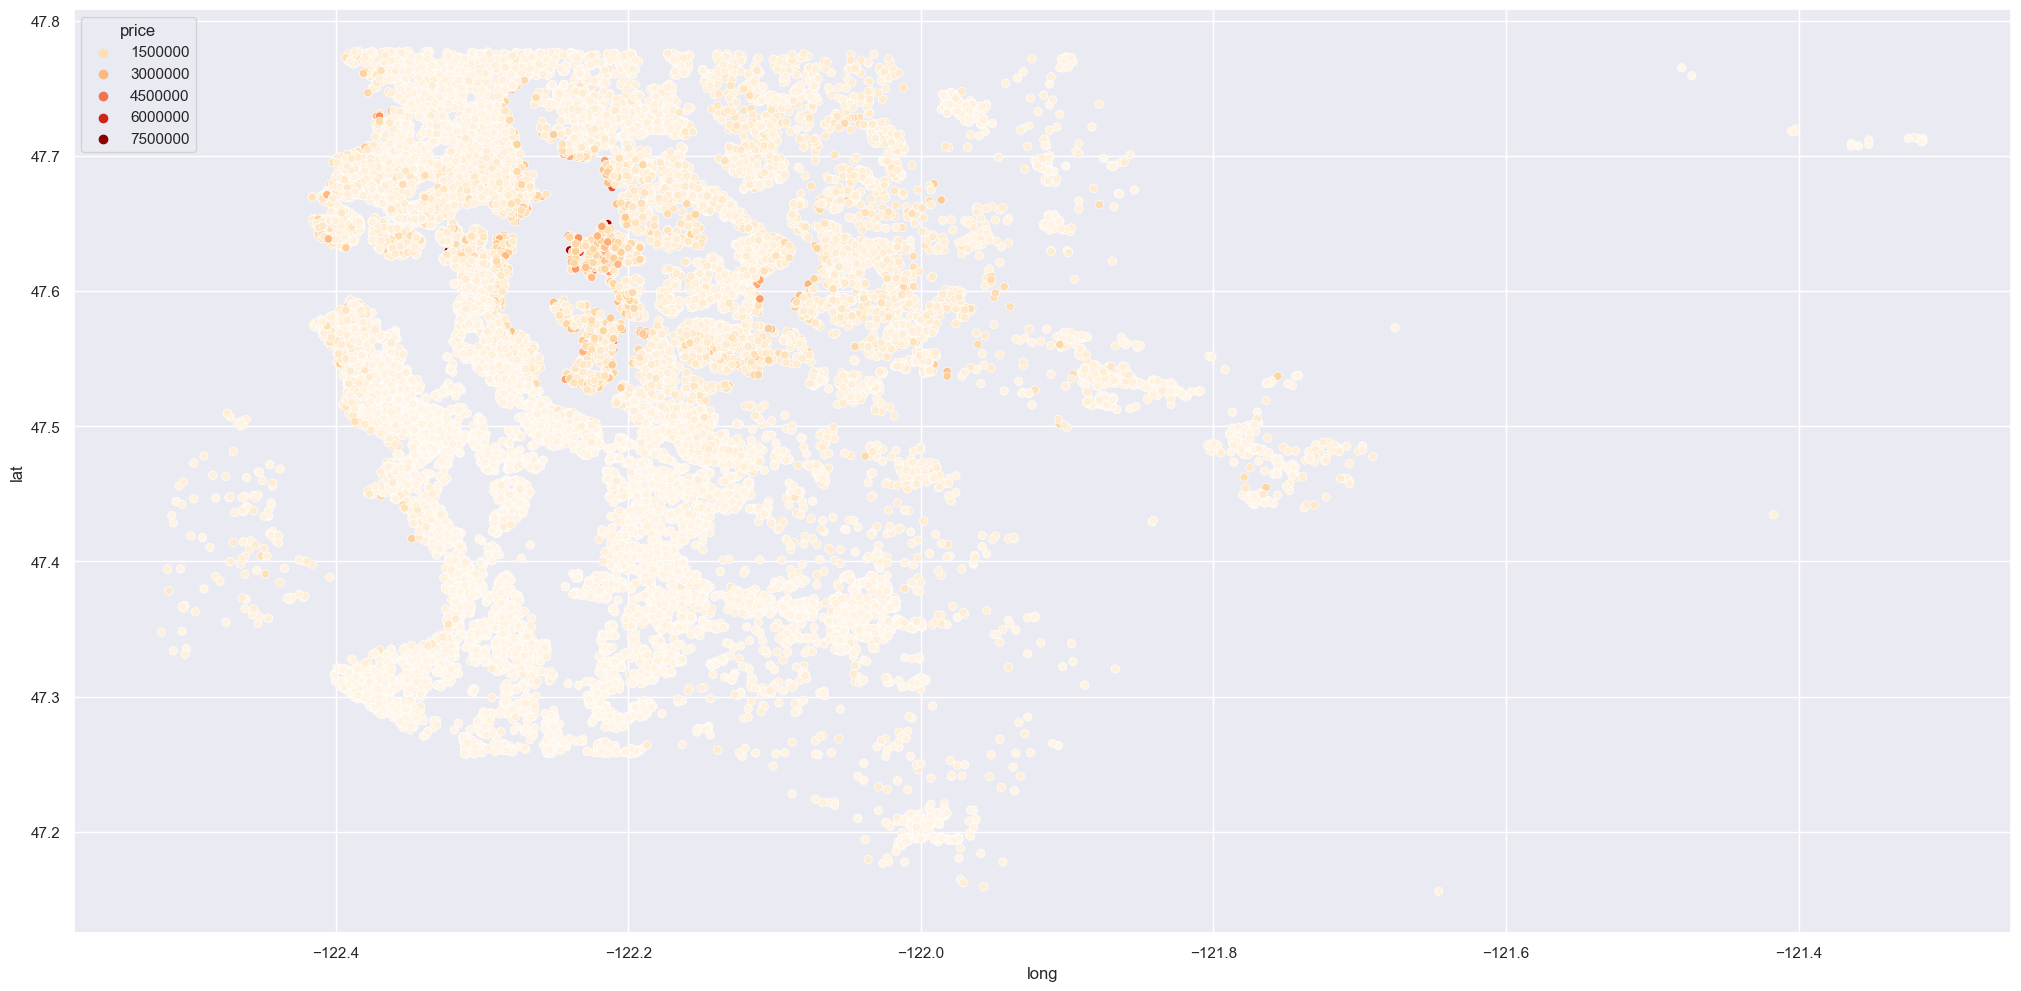

In [471]:
# visualize the physical locations of the houses, highlighted by their corresponding prices
import seaborn as sns
sns.scatterplot(x='long',y='lat',hue='price' ,data=df, palette='OrRd')

AS informed by the above 'price heatmap' of the house locations, the expensive houses (with price > 1500000) are concentrated on a specific region, indicating that the feature 'long' and 'lat' can collectively provide valuable information for the model training and so should be included in the training set

However, as most of the houses (data points) have the light yellow colour (most of the house prices in the dataset are less 1500000), the target variable 'price' is likely to be right-skewed, which can be seen from the following 'price' distribution. 

Depending on the business context, we may choose to drop out the houses with high prices (>3000000) to ensure that the linear models are free from the impacts of those outliers -> but as the business context is not provided in this assignment, I will simply retain all the records  

<Axes: xlabel='price', ylabel='Count'>

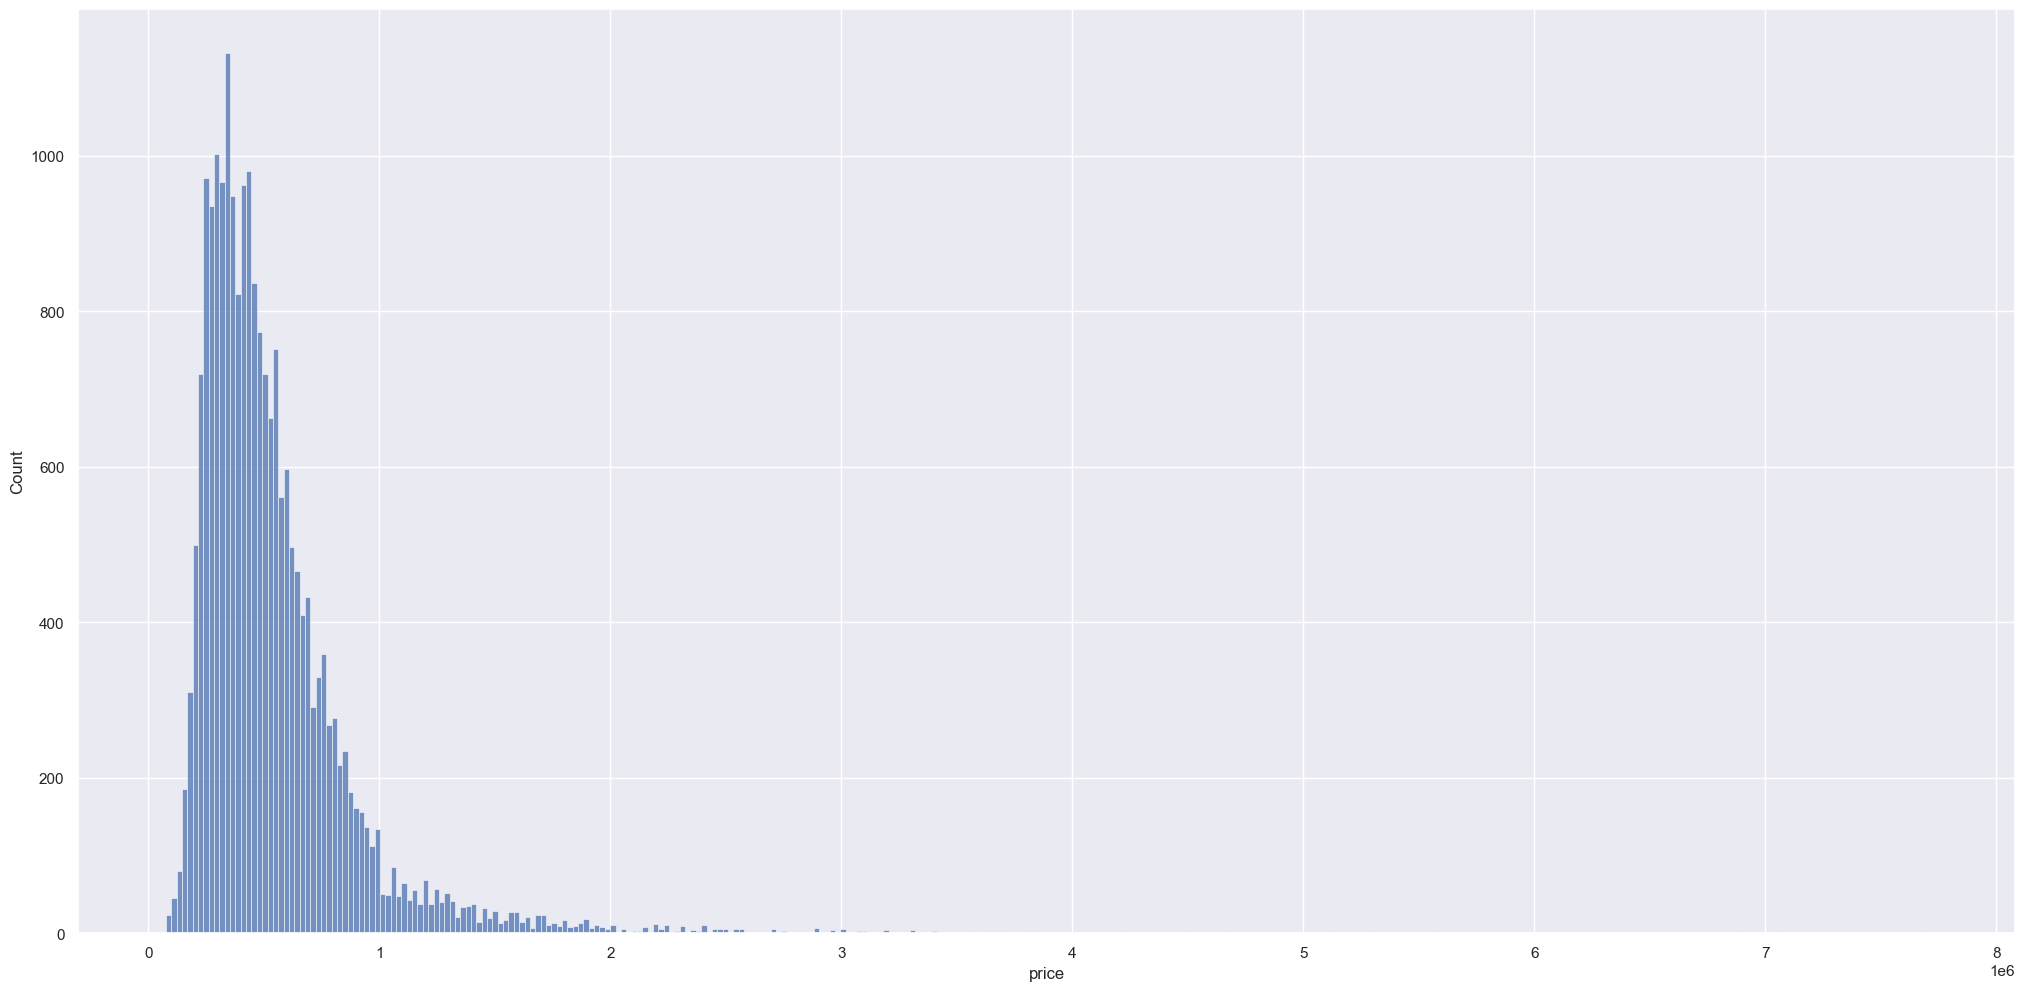

In [473]:
sns.histplot(df['price'])

## Feature Selection

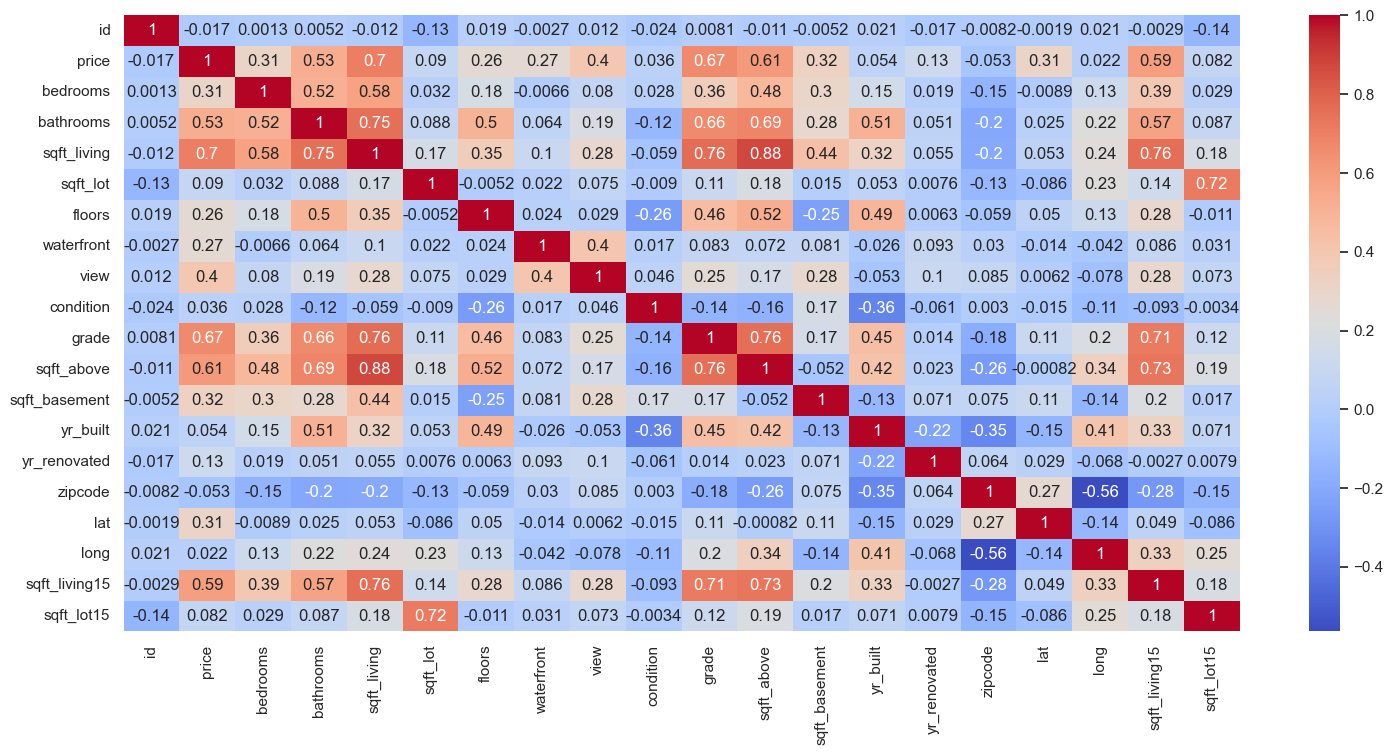

In [474]:
import seaborn as sns
# Correlation matrix heatmap

sns.set(rc={'figure.figsize':(18,8)})
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#### As shown by the above correlation matrix, some numeric features are highly correlated with each other, such as 'sqft_above' and 'sqft_living' (0.88), 'sqft_living15' and 'sqft_living' (0.76), which gives some implications about what  features should be excluded from the training set. 

#### For example, we should exclude feature 'sqft_living' and 'sqft_lot' from the training set as they are highly correlated with the feature 'sqft_living15' and 'sqft_lot15' to avoid collinearity within the data that can compromise the accuracy and the interpretability of the linear regression model (as the feature independence assumption of the linear model needs to be hold), while the collinearity in the trainig set may also lead to overfitting.

#### Hence, since an absolute correlation coefficient of >0.7 among two input features indicates the presence of collinearity, we have to manually drop one feature in each feature pair that has Pearson correlation coefficient > 0.7.

It is also noteworthy that the high linear correlation between 'sqft_living', 'sqft_lot' and 'sqft_living15', 'sqft_lot15' may imply that the neighbouring houses have similar interior housing living space and land lots)

In [480]:
# note that feature 'id' is not included in the training set as it does not provide any meaningful information for the model training 
independent_feature = ['bedrooms', 'bathrooms', 'floors', 
                       'waterfront', 'view', 'condition', 
                       'grade', 'sqft_basement', 'yr_built', 
                       'yr_renovated', 'zipcode', 'lat','long']
target_feature = ['price']

#### As shown above, the features 'sqft_living15' is also excluded from the training set as it is highly correlated with the feature 'grade' and 'sqft_above' (0.71, 0.73), which are 2 important features to differentiate individual houses (while sqft_living15 is more like an aggregated feature that represents the size of interior housing living space for the nearby 15 houses). However, 'sqft_above' is also not included in the training set too as it is highly correlated with the feature 'grade' (0.76).

#### The reason of choosing 'grade' over 'sqft_above' is that the 'grade' is a more comprehensive feature (classification by construction quality which refers to the types of materials used and the quality of workmanship) that may contain more information or variances than 'sqft_above' to differentiate a house. -> Increasing the linear model correctness more than the 'sqft_above' feature can do as shown below



In [476]:
results = ols("price ~ grade", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.736e+04
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:11:49   Log-Likelihood:            -3.0123e+05
No. Observations:               21613   AIC:                         6.025e+05
Df Residuals:                   21611   BIC:                         6.025e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.056e+06   1.23e+04    -86.166      0.0

In [477]:
results = ols("price ~ sqft_above", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                 1.251e+04
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:11:49   Log-Likelihood:            -3.0267e+05
No. Observations:               21613   AIC:                         6.053e+05
Df Residuals:                   21611   BIC:                         6.054e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.995e+04   4729.812     12.676      0.0

#### As informed by the above R-squared value, the feature 'grade' explains 44.5% of the variance of the target variable 'price', while the feature 'sqft_above' only explains 36.7% of that, supporting our previous decision of retaining 'grade' over 'sqft_above'

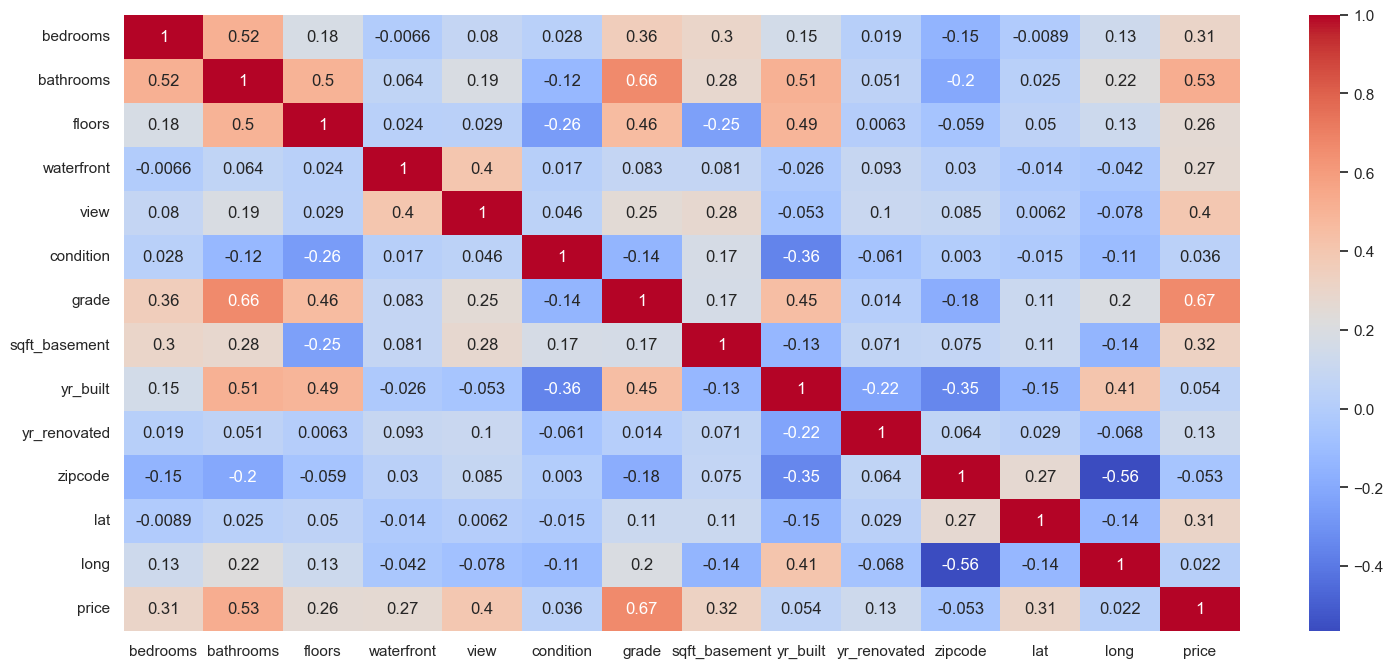

In [481]:
# check correlation matrix again to ensure no colinearity (corr < 0.7) within the training data
sns.set(rc={'figure.figsize':(18,8)})
corr_matrix = df[independent_feature + target_feature].corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Data Cleaning (missing value checking + outlier detection)

#### Start by Removing the Duplicate Data Records
because it should be safe to assume that the sales of the exact same houses in the same locations at the same dates are due to human error during the data collection phase, rather than capturing the actual sales of the houses. Thus, it should be sensible to drop all the duplicate records first

In [482]:
df.drop_duplicates(inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Missing value checking
No missing value is detected in this dataset, meaning that no imputation strategy is needed in this case
 

In [59]:
missing = df.isnull().sum()
print(missing)


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


## Outlier Checking & Feature Engineering

    1. As shown by the below boxplots, some features are highly biased or skewed, such as the feature 'view' and 'yr_renovated', where '0' is given to more than 75% of the data records, meaning that we need to investigate those features more to decide if we should preserve them or not 

    2. The variable 'bedrooms' and 'bathrooms' have some outliter records (particularly a record that has more than 30 bedrooms), while the target variable 'price' also have many outlier values displayed, meaning that it may not be sensible to drop all the records with outlier feature values as they may correspond to the outliers in the 'price'. Hence, further investigations are needed

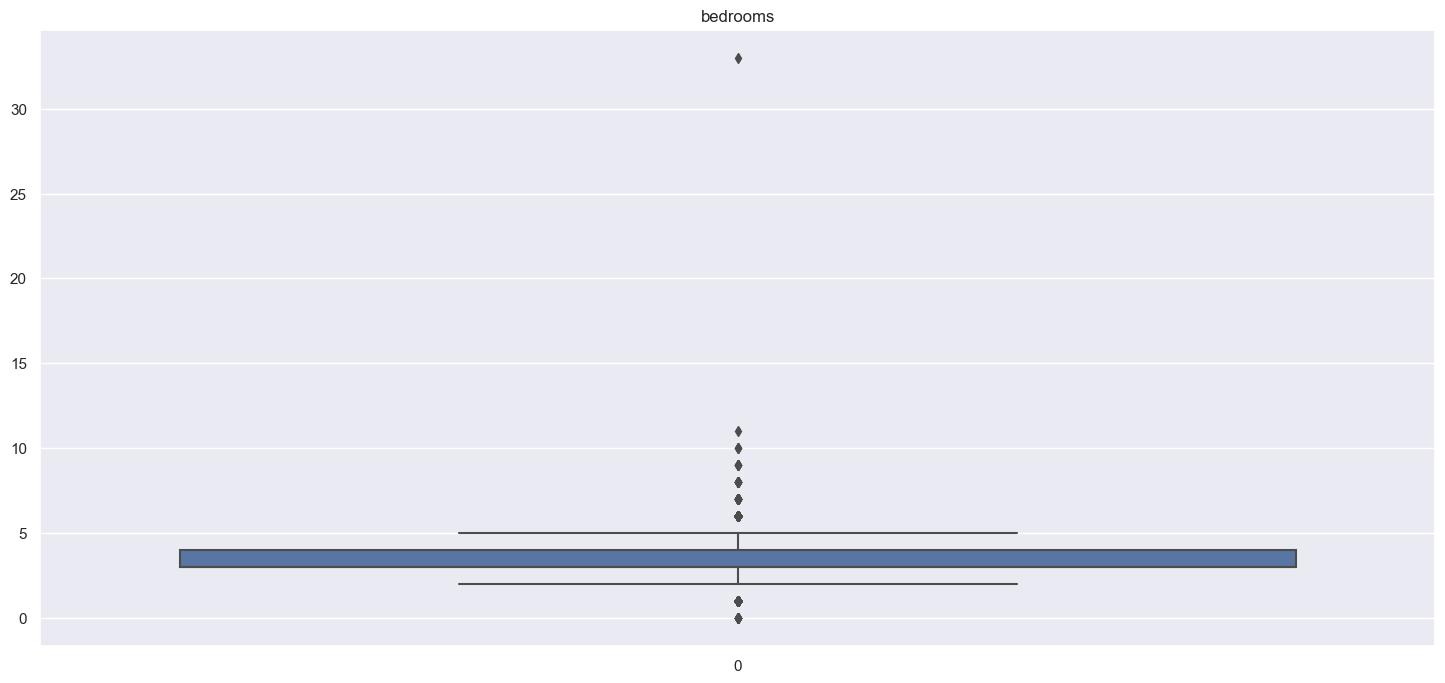

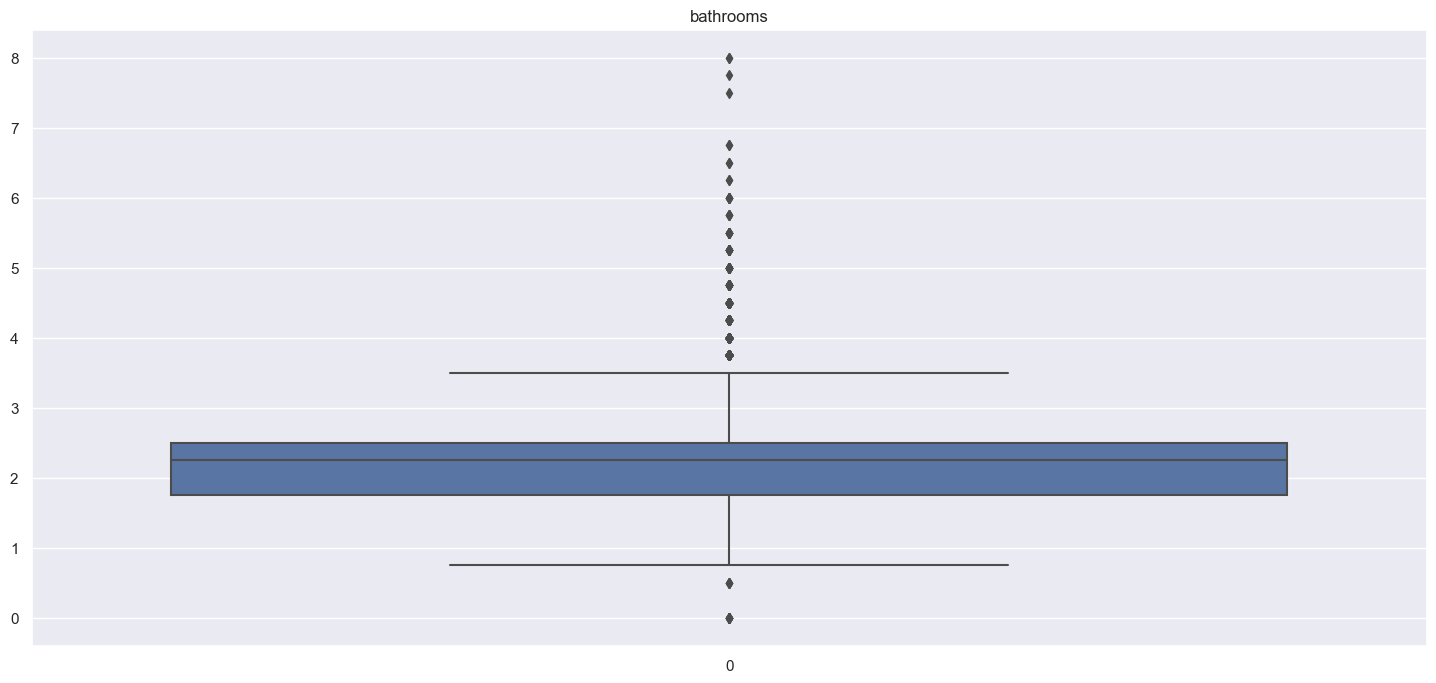

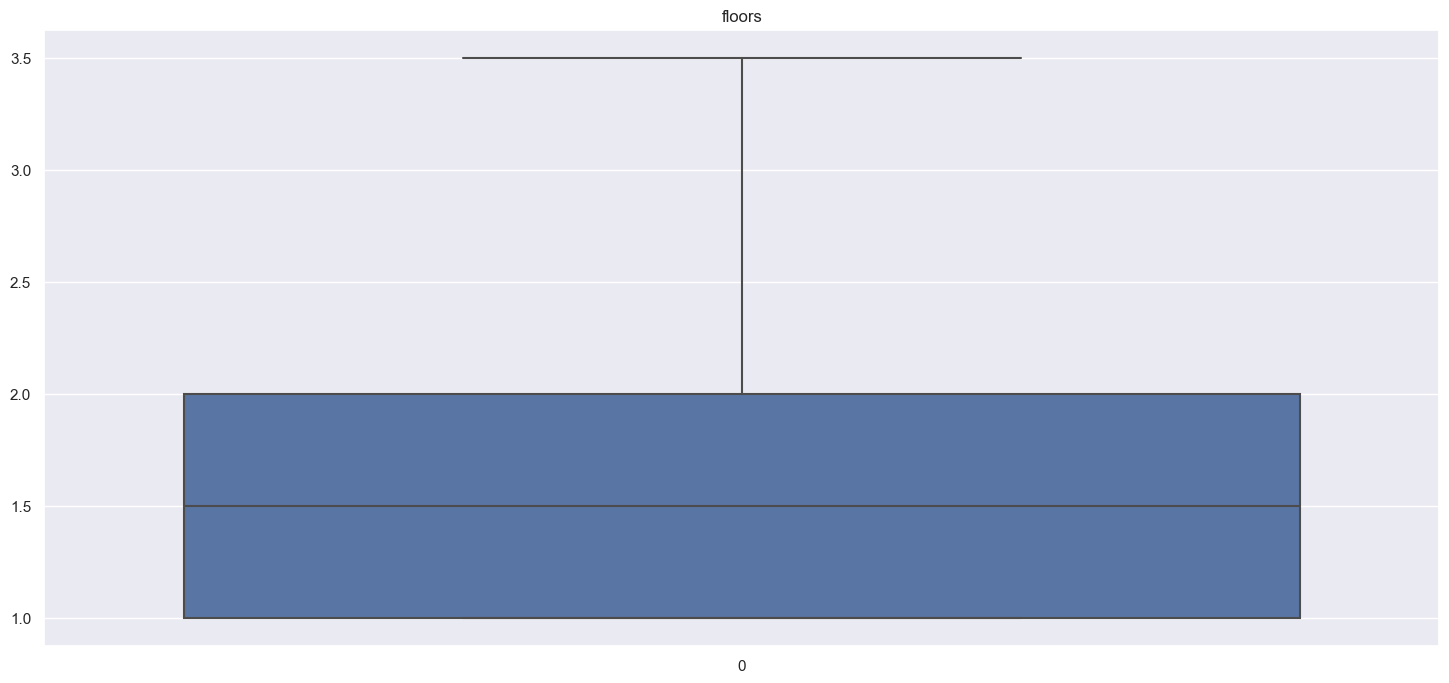

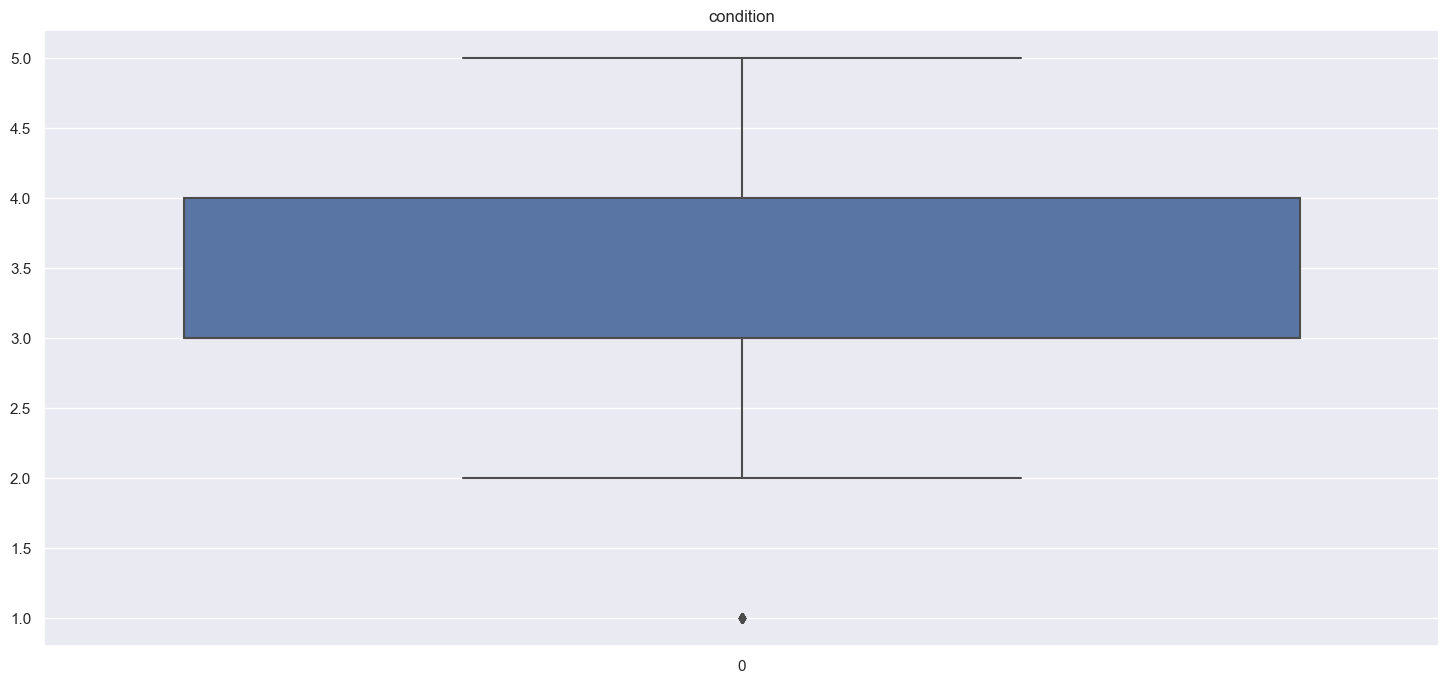

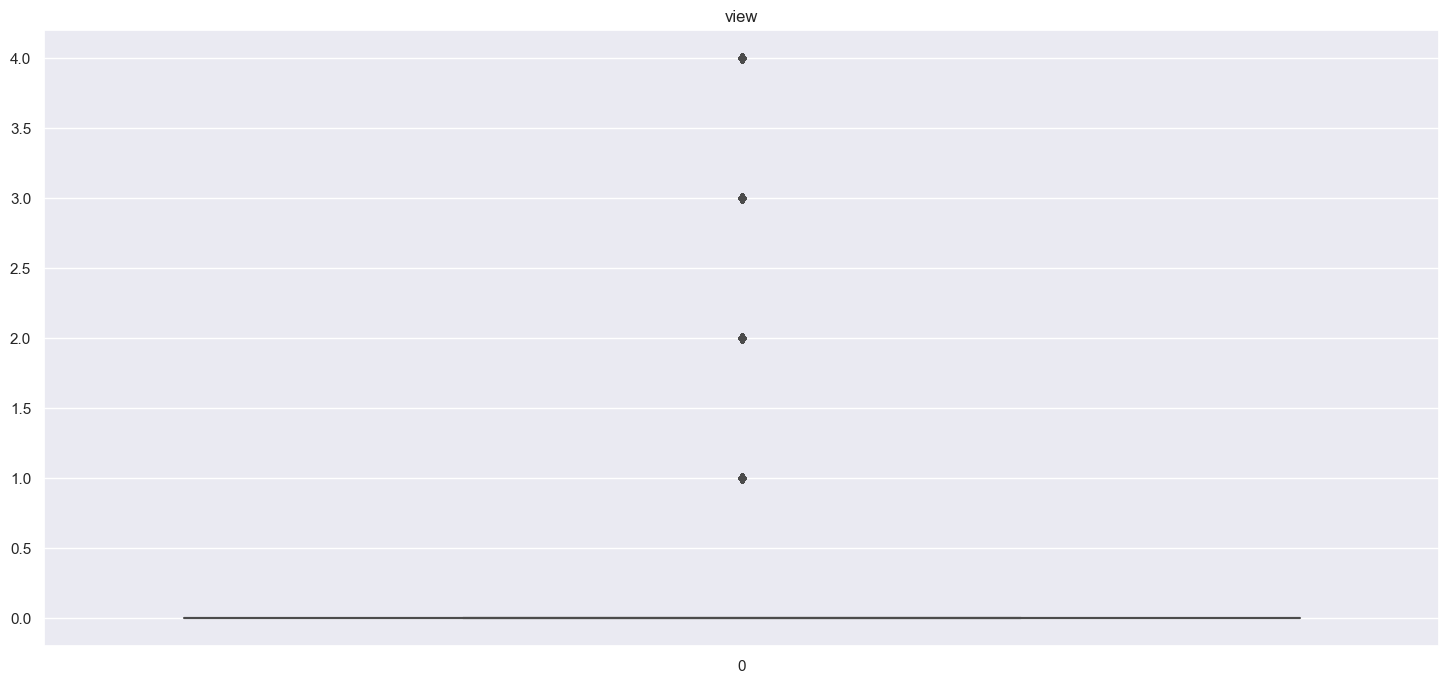

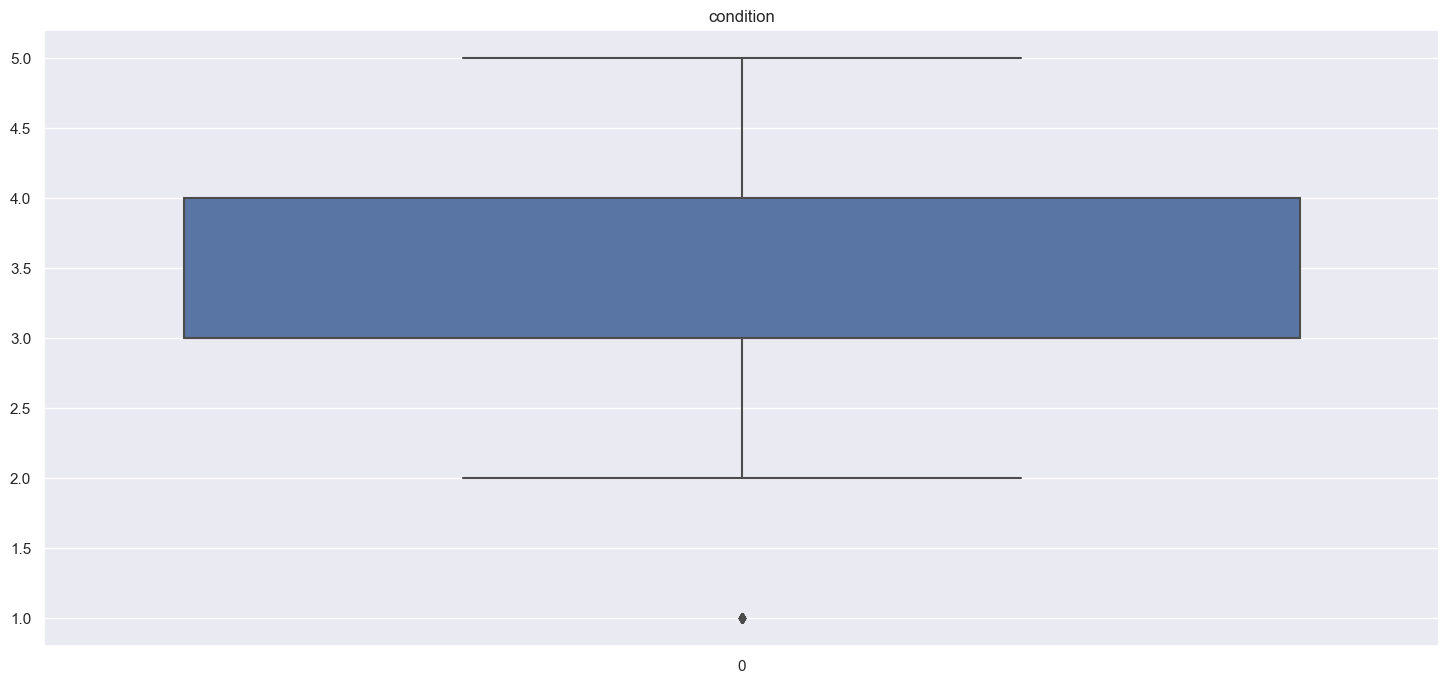

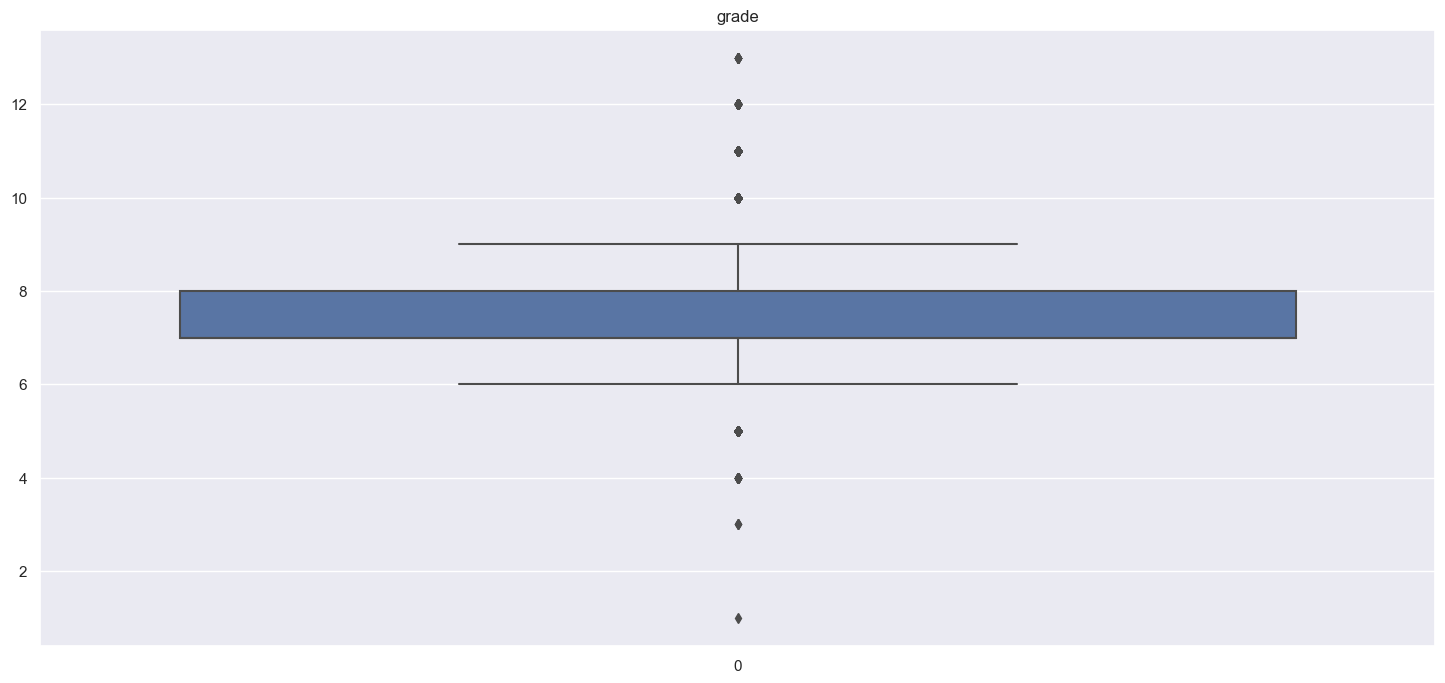

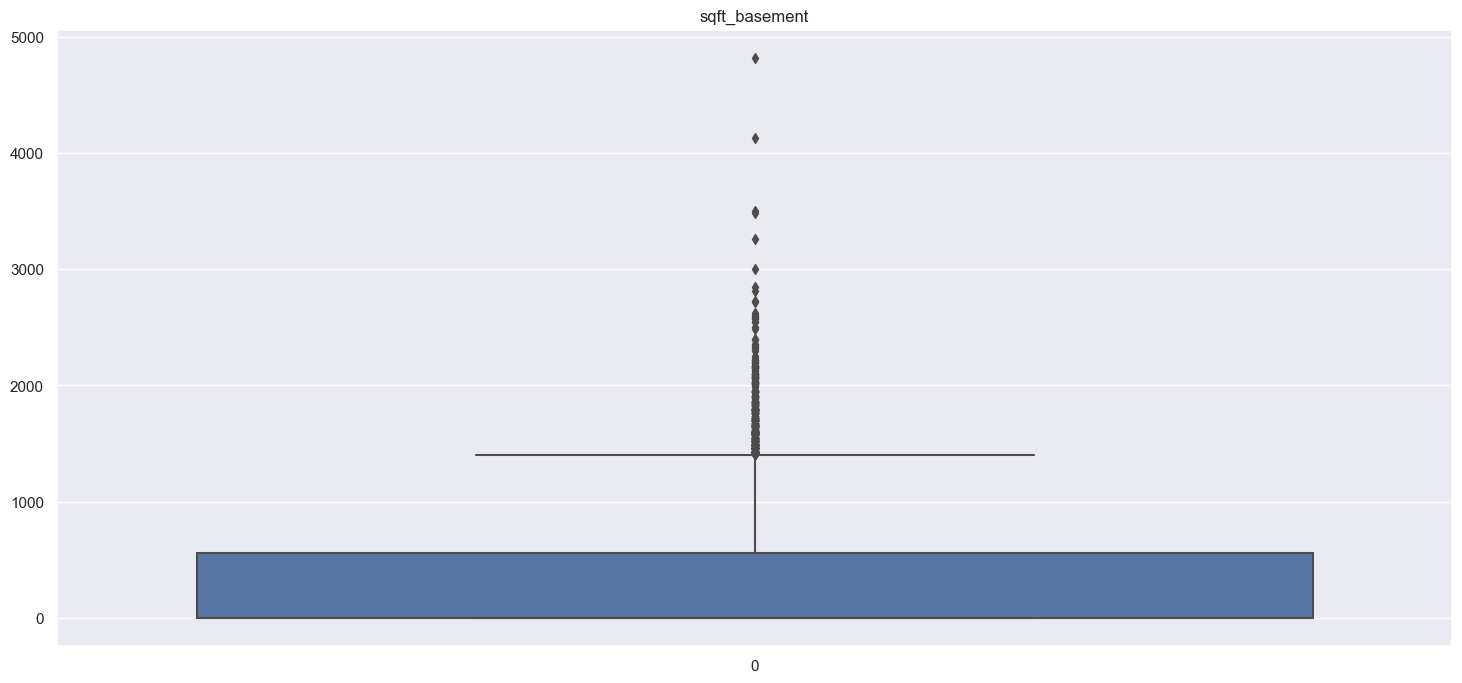

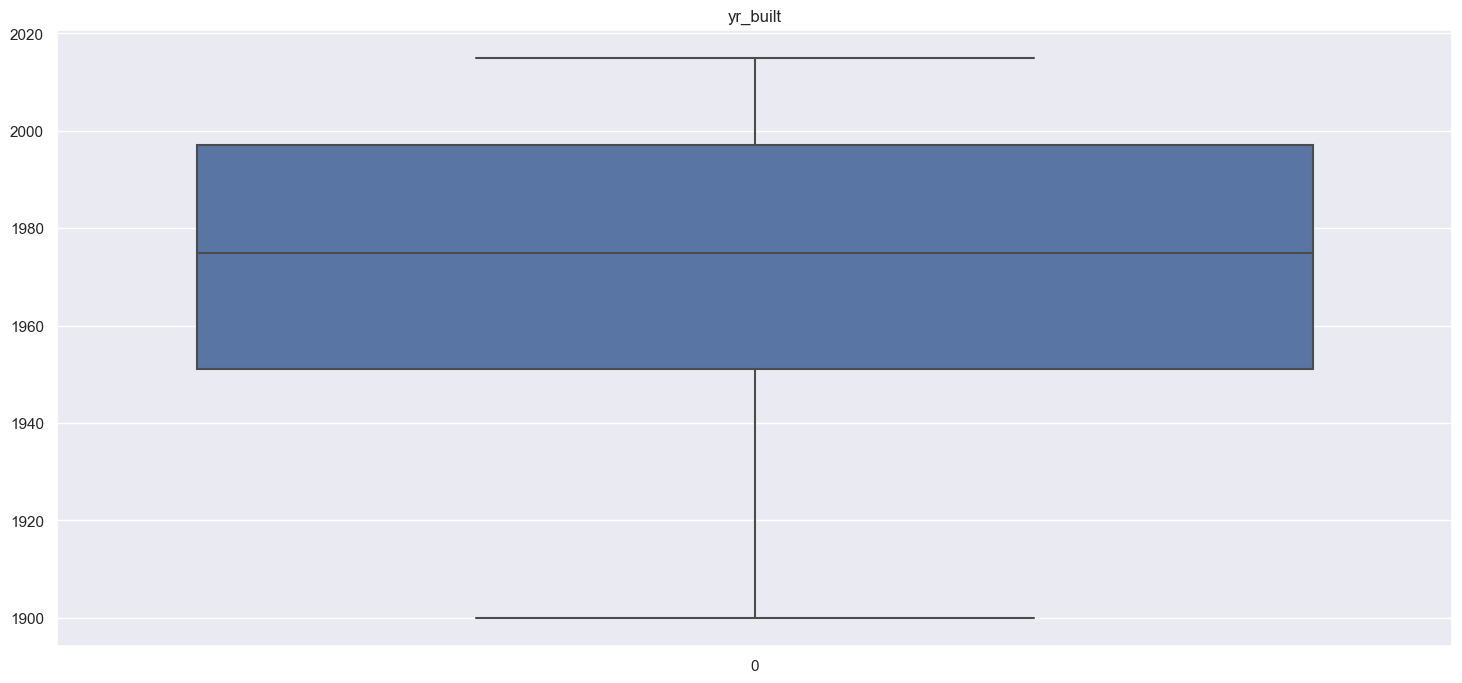

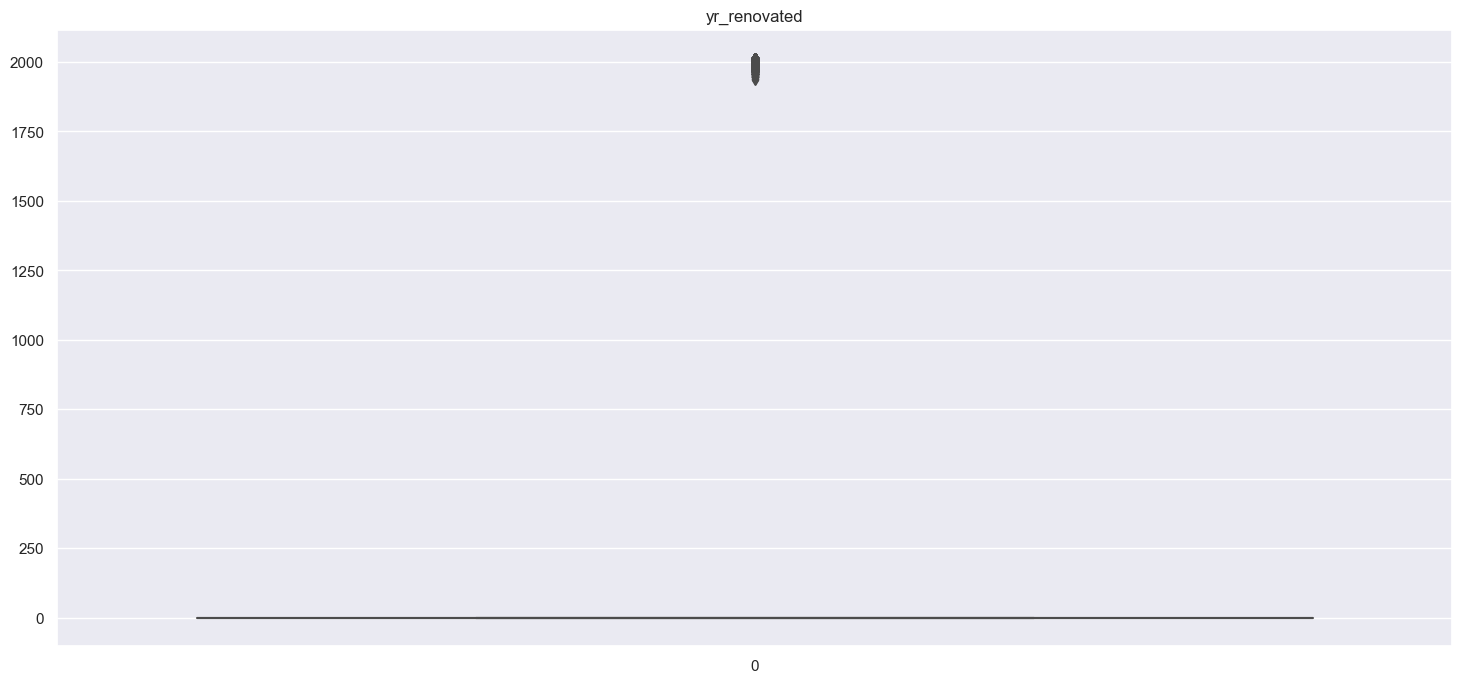

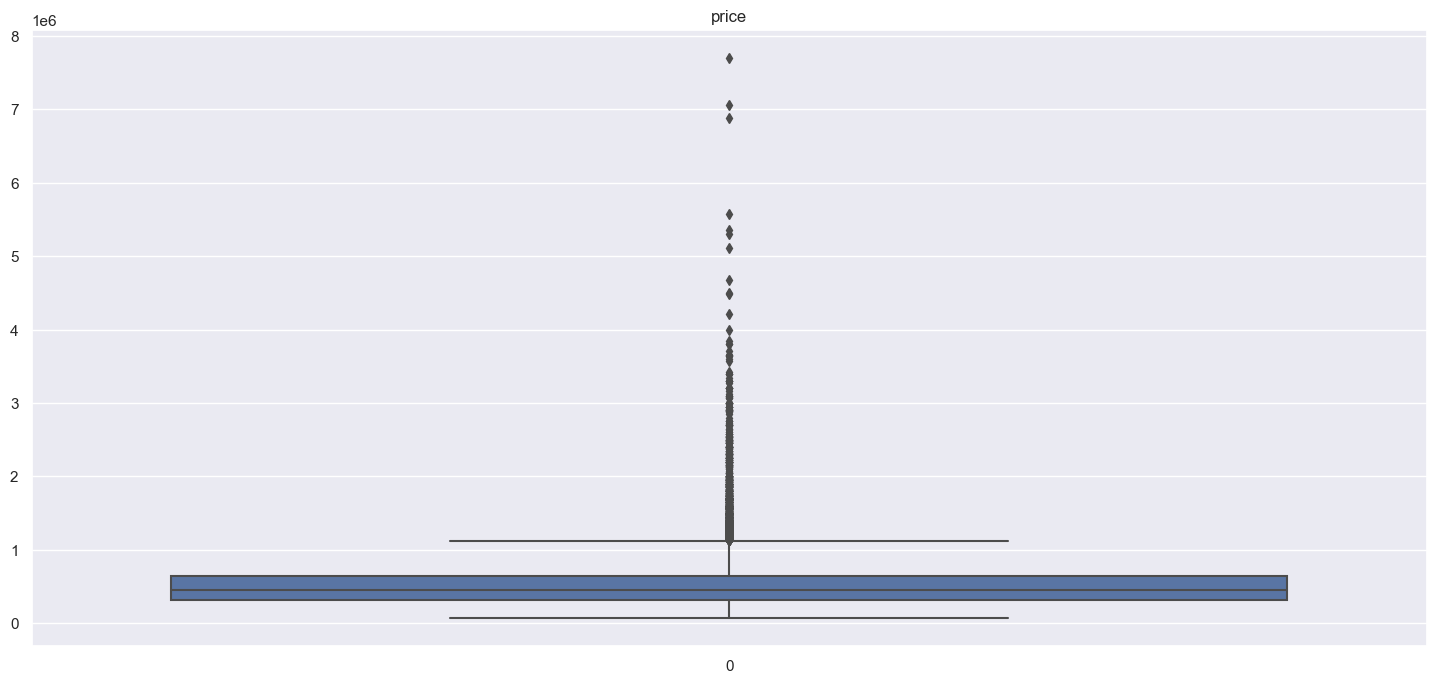

In [483]:
# check outliers for some meaningful variables
meaningful_var = ['bedrooms', 'bathrooms', 'floors',  'condition', 
                  'view', 'condition',
                  'grade', 'sqft_basement', 'yr_built', 
                  'yr_renovated', 'price']

for i in meaningful_var:
    plt.title(i)
    sns.boxplot(df[i])
    plt.show()

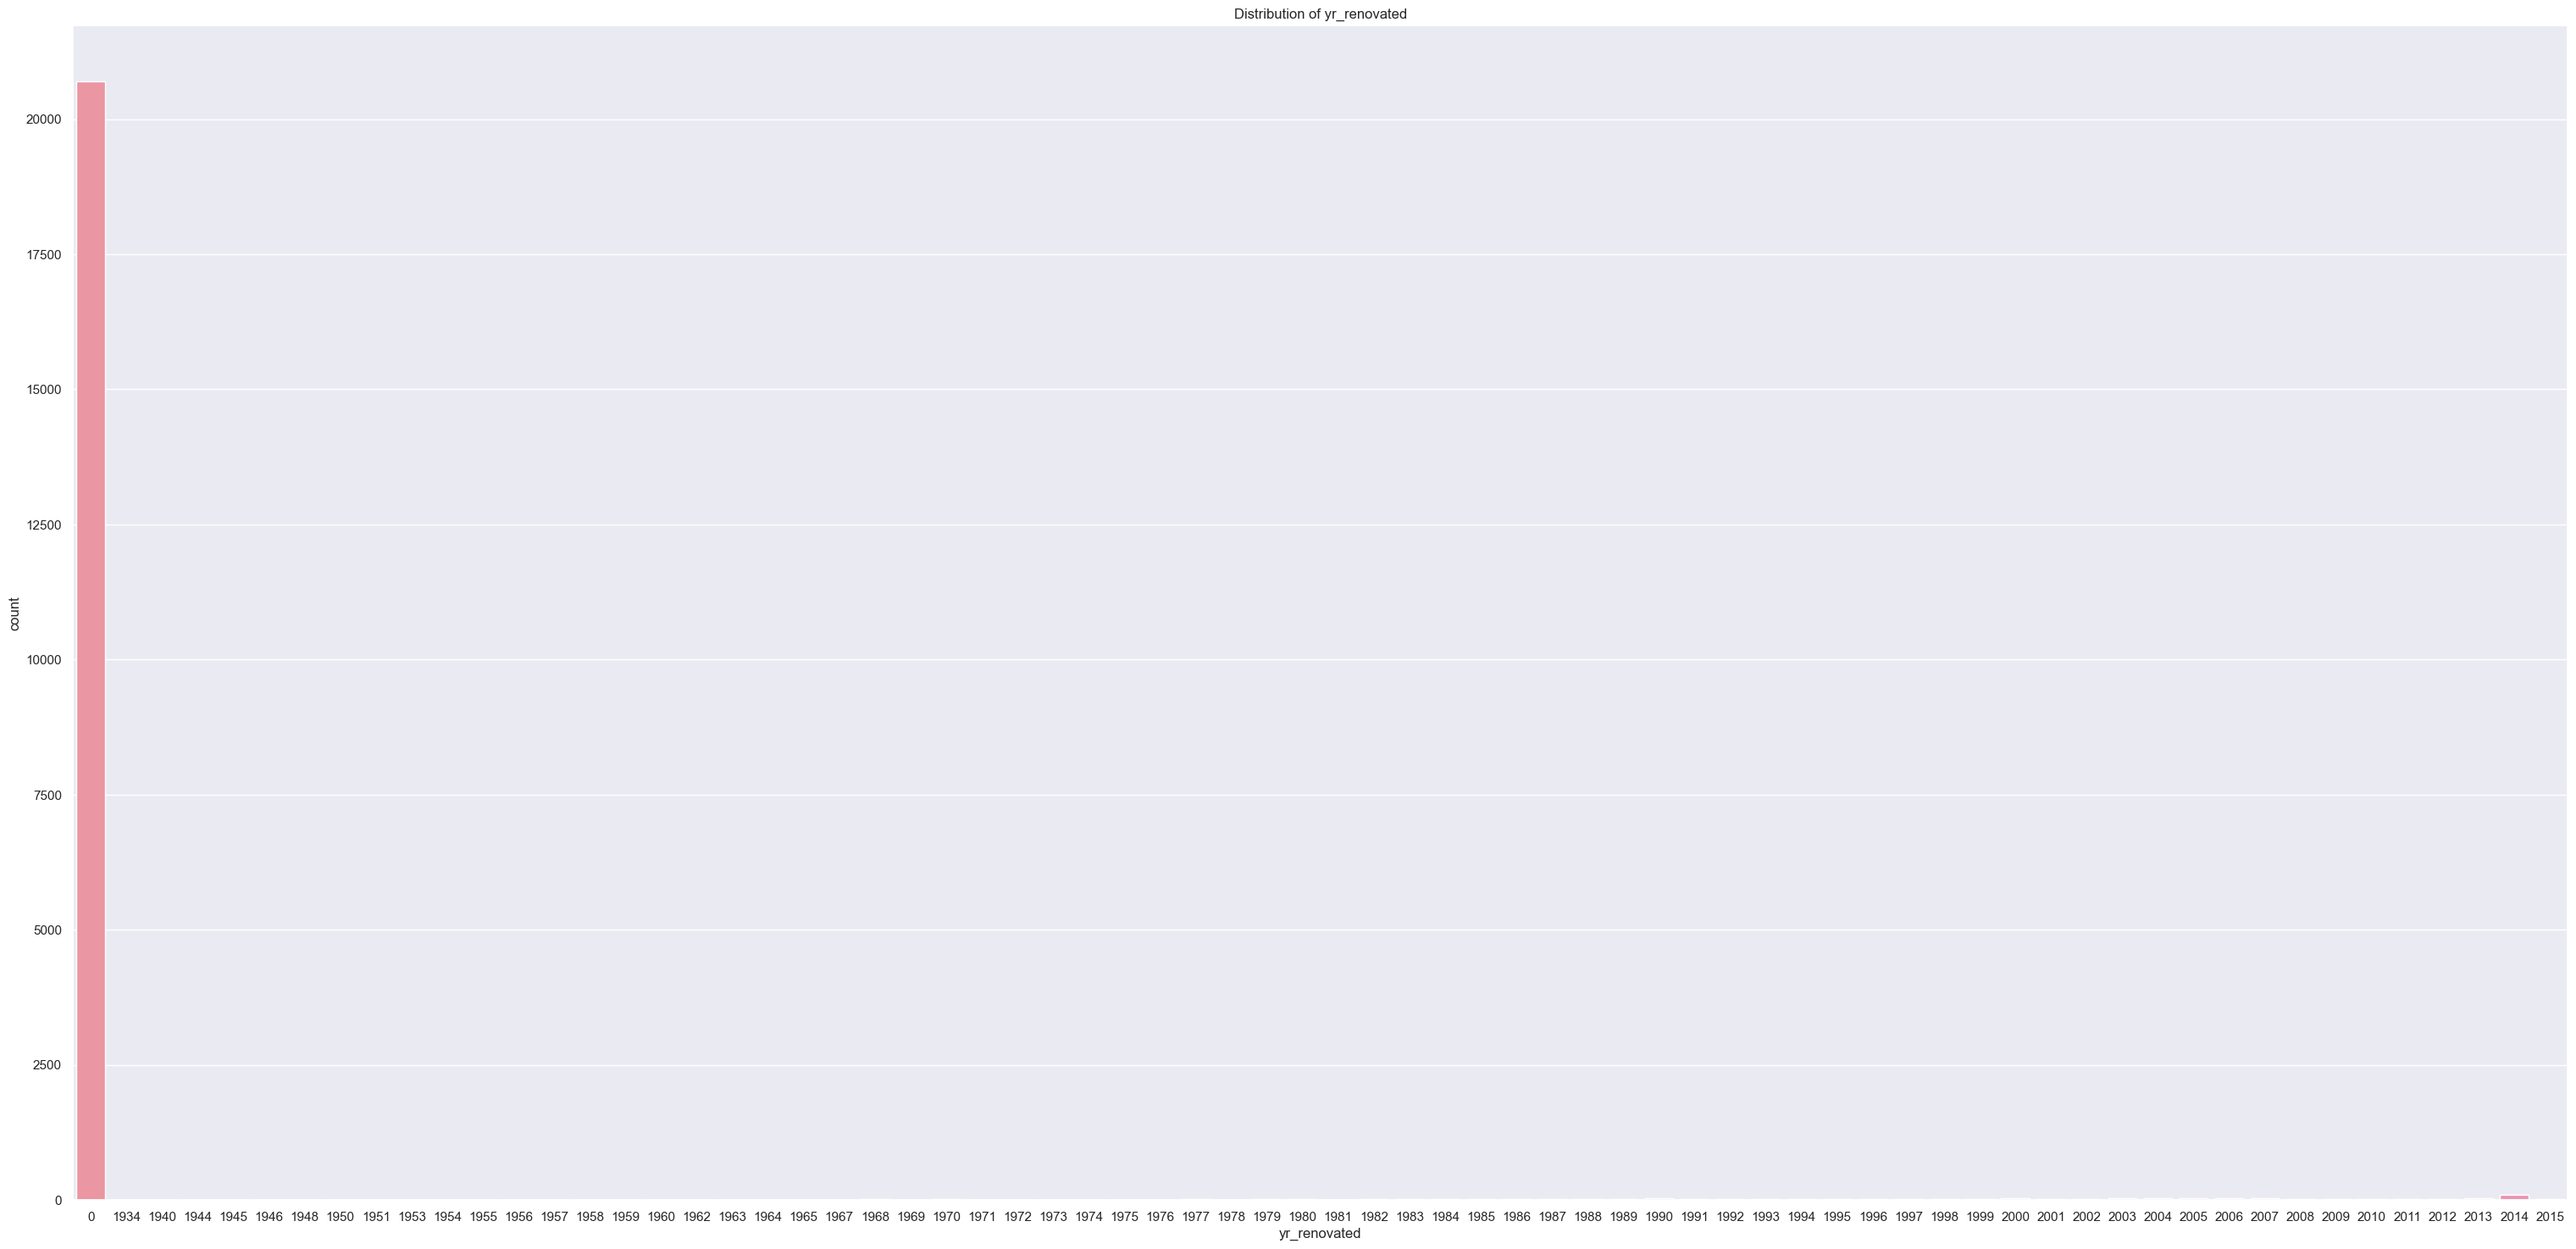

Proportions of yr_renovated
yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64


In [488]:
# check 'yr_renovated'
sns.set(rc={'figure.figsize':(38,18)})
sns.countplot(x = "yr_renovated", data = df)
plt.title("Distribution of yr_renovated")
plt.show()

print("Proportions of yr_renovated")
print(df.yr_renovated.value_counts())

#### As shown above, nearly 95% of houses in the dataset have never been renovated before (yr_renovated = 0), implying that we can either drop the feature 'yr_renovated' as the feature may just introduce noises into the data, or convert the feature into a dummy variable, called 'renovated', where 0 indicates 'never renovated' and 1 indicates 'has been renovated', to reduce the sparse data impact and to slightly increase the model performance

In [489]:
# Create function to categorize the numeric variable
def zero_dummy(x):
    if x == 0:
        return 0
    else:
        return 1

# Convert the 'yr_renovated' variable into a boolean variable using yr_renovate_dummy() function defined above
df['yr_renovated'] = df['yr_renovated'].apply(zero_dummy)
# this .apply() applies 'yr_renovate_dummy' function to each value in the df['yr_renovated'] series


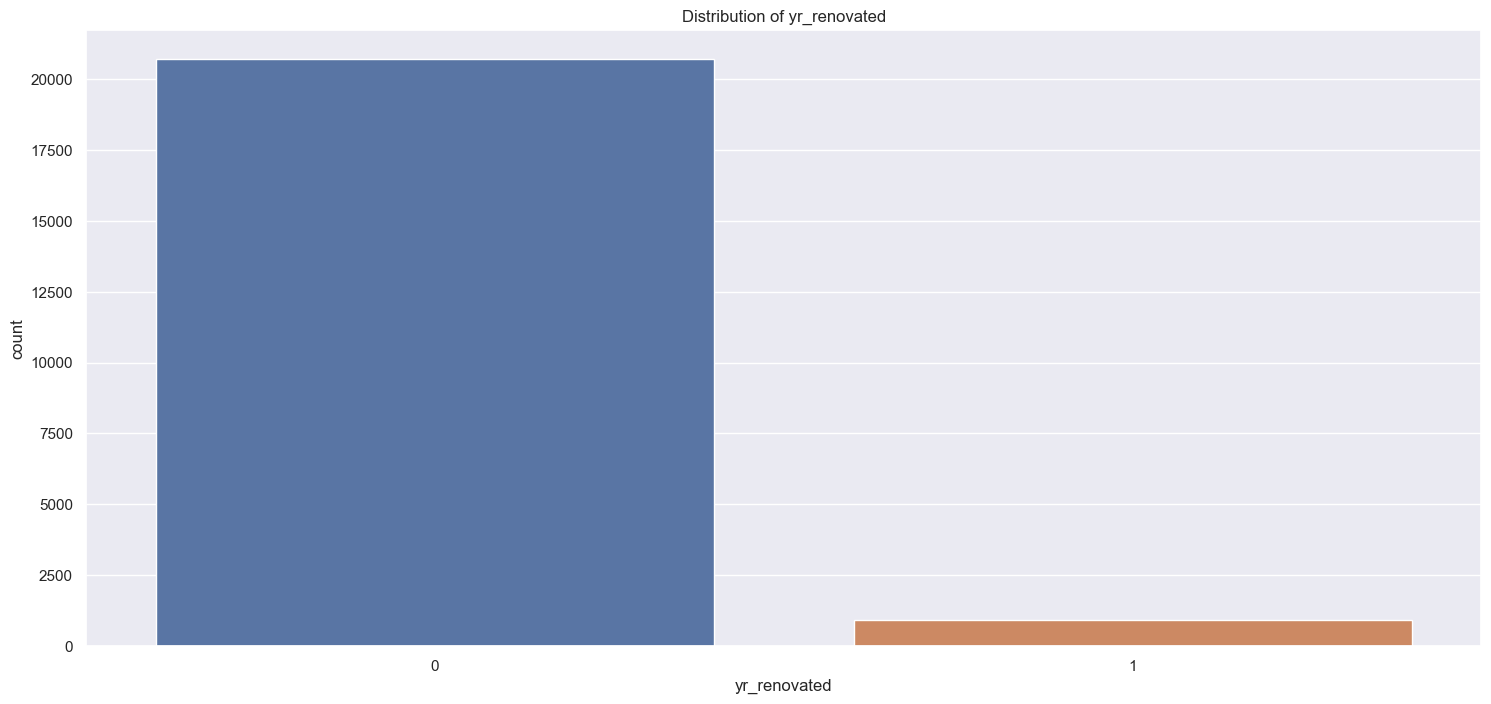

In [490]:
sns.set(rc={'figure.figsize':(18,8)})
sns.countplot(x = "yr_renovated", data = df)
plt.title("Distribution of yr_renovated")
plt.show()

Now let check the distribution of the 'view' rank variable 

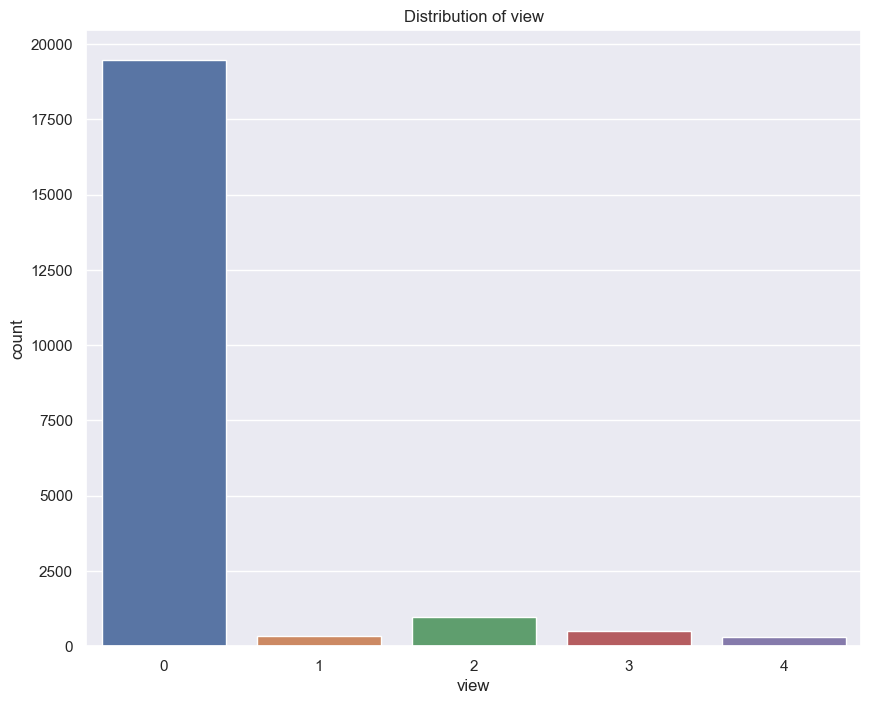

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64


In [491]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x = "view", data = df)
plt.title("Distribution of view")
plt.show()

print(df.view.value_counts())

#### Again, nearly 90% of houses in the dataset do not have a good view (view = 0), implying that we can either drop the feature 'view' as it may just introduce noises into the data, or convert it into one dummy variable like 'yr_renovated'. However, since it is possible that a house with better view tends to have a better sale price, this feature may serve as a good indicator / differentiator of house price, while it also have moderately positive correlation with 'price' (0.4) as indicated by the above correlation matrix.

The distribution of prices of houses with 'view' equal to 4 (best view) and 0 (worst view) are displayed below: 

Statistics of house with view = 4: 
count    3.190000e+02
mean     1.463711e+06
std      9.522096e+05
min      2.520000e+05
25%      8.175000e+05
50%      1.185000e+06
75%      1.850000e+06
max      6.885000e+06
Name: price, dtype: float64


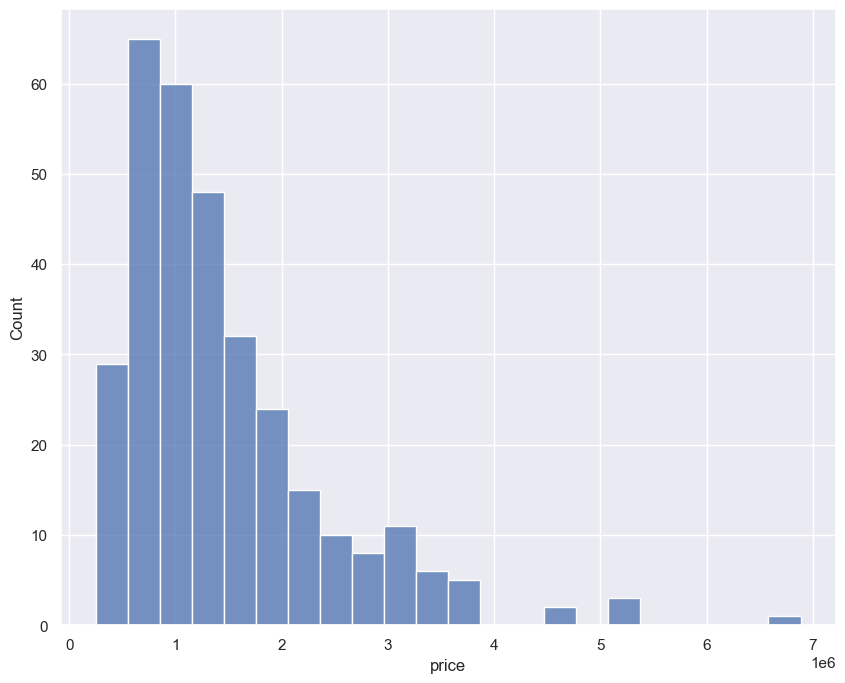

Statistics of house with view = 0: 
count    1.948900e+04
mean     4.965642e+05
std      2.871333e+05
min      7.500000e+04
25%      3.110000e+05
50%      4.325000e+05
75%      6.000000e+05
max      5.570000e+06
Name: price, dtype: float64


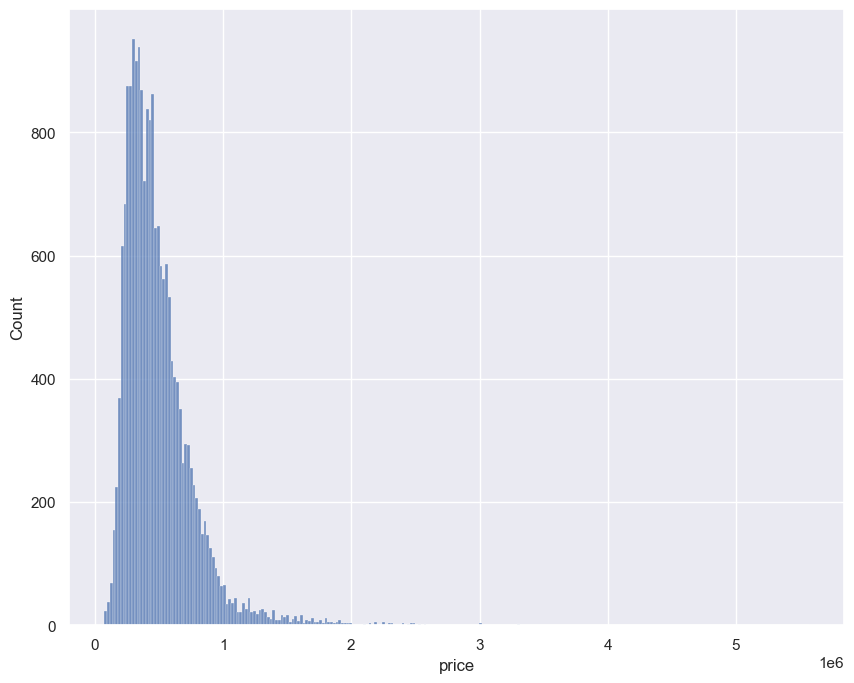

In [492]:
sns.histplot(df[df['view'] == 4]['price']) # plot distribution of best view houses' prices
print('Statistics of house with view = 4: ')
print( df[df['view'] == 4]['price'].describe())
plt.show()

sns.histplot(df[df['view'] == 0]['price']) # plot distribution of worst view houses' prices
print('Statistics of house with view = 0: ')
print( df[df['view'] == 0]['price'].describe())

#### As we can see, though both prices of houses with 'view' equal to 0 and 4 are right-skewed, most of the houses (>75%) with view = 0 are located within the price range [0, 1e+06], with median value being 432500 and the mean value being 496564, while <50% of the houses with view = 4 are located within the price range [0,1e+06], with median value being 1185000 and the mean value being 1463711. Hence, the 'view' feature can serve as a good indicator / differentiator of house price, and should be one-hot encoded rather than being dropped or converted into a single dummy variable to preserve maximal amount of information within the fetaure

#### Now, let check the % of variances of prices that can be explained by the dummy variables of 'view'

Note: We can optionally not to concatenate the dummy variables to the main dataframe as we can let the following pipeline to do the one-hot encoding for us  

In [493]:
# covert numeric variables into categorical variables 
dummies_view = pd.get_dummies(df.view, dtype=int)
dummies_view.rename(columns={0:'worst',1:'low', 2:'medium', 3:'high', 4:'premium'}, inplace=True)
dummies_view

,worst,low,medium,high,premium
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
21608,1,0,0,0,0
21609,1,0,0,0,0
21610,1,0,0,0,0
21611,1,0,0,0,0


In [494]:
dummies_view_price = pd.concat([df[target_feature], dummies_view],axis=1)

results = ols("price ~ worst + low + medium	+ high + premium", data=dummies_view_price).fit()
print(results.summary())
# not many are explained by the season, and p>0.05, meaning insignificance

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     874.1
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:59:55   Log-Likelihood:            -3.0561e+05
No. Observations:               21613   AIC:                         6.112e+05
Df Residuals:                   21607   BIC:                         6.113e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.196e+15   1.41e+16      0.368      0.7

As shown above, around 16.8% variance within 'price' are explained by the 5 dummy variables of 'view', which is not too bad, though their p-values are all larger than 0.05 (implying statistical insignificance, but may be useful when trained with other features) 

### Ordinary Least Squares Regression
We will now train a linear regression model with using the stats library first as it can provide useful visualizations like Q-Q plot and the influence / leverage plot

In [495]:
independent_feature = ['bedrooms', 'bathrooms', 'floors', 'waterfront',
                       'condition', 'grade', 'sqft_basement', 'yr_built',
                        'yr_renovated', 'zipcode', 'lat', 'long'] 
df_stats = pd.concat([df[independent_feature + target_feature], dummies_view],axis=1)

df_stats

,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price,worst,low,medium,high,premium
0,3,1.00,1.0,0,3,7,0,1955,0,98178,47.5112,-122.257,221900.0,1,0,0,0,0
1,3,2.25,2.0,0,3,7,400,1951,1,98125,47.7210,-122.319,538000.0,1,0,0,0,0
2,2,1.00,1.0,0,3,6,0,1933,0,98028,47.7379,-122.233,180000.0,1,0,0,0,0
3,4,3.00,1.0,0,5,7,910,1965,0,98136,47.5208,-122.393,604000.0,1,0,0,0,0
4,3,2.00,1.0,0,3,8,0,1987,0,98074,47.6168,-122.045,510000.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,3.0,0,3,8,0,2009,0,98103,47.6993,-122.346,360000.0,1,0,0,0,0
21609,4,2.50,2.0,0,3,8,0,2014,0,98146,47.5107,-122.362,400000.0,1,0,0,0,0
21610,2,0.75,2.0,0,3,7,0,2009,0,98144,47.5944,-122.299,402101.0,1,0,0,0,0
21611,3,2.50,2.0,0,3,8,0,2004,0,98027,47.5345,-122.069,400000.0,1,0,0,0,0


In [496]:
# note: we have not standardized the data yet
results = ols("price ~ bedrooms + bathrooms	+ floors + waterfront + condition + grade + sqft_basement + yr_built + yr_renovated	+ zipcode + lat + long + worst + low + medium + high + premium", 
              data=df_stats).fit() 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     2573.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:30:34   Log-Likelihood:            -2.9608e+05
No. Observations:               21613   AIC:                         5.922e+05
Df Residuals:                   21596   BIC:                         5.923e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.907e+07   2.53e+06     11.498

#### As indicated above, only 65.6% of variances in price (Adj. R-squared = 0.656) is explained by the independent features, which is moderately satisfactory, and it is noteworthy that we have not standardized / normalized the training data, meaning that we can compare the difference in the model performances between training on original data and on the normalized data 

#### Moreover, MinMax Scaler is preferred in this context over standard scaler, as the standard scaler can produce negative results, and we cannot accept negative values in this case as no price or other feature values of the house like the # of bedrooms should be negative

In [497]:
from sklearn.preprocessing import MinMaxScaler

# Standardize the features
scaler = MinMaxScaler() # minmaxScaler() scale values from 0 to 1, standard scaler convert data into zero-mean & unit variance
temp = df_stats.columns.to_list()
temp.remove('price') # do not normalize the target variable to ensure the interpretability of the weights of the linear model 

df_std = scaler.fit_transform(df_stats[temp])
df_std = pd.DataFrame(df_std, columns=[i for i in temp])
df_std = pd.concat([df_std,df_stats['price']], axis=1 ) # add the price feature back
df_std


,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,worst,low,medium,high,premium,price
0,0.090909,0.12500,0.0,0.0,0.5,0.500000,0.000000,0.478261,0.0,0.893939,0.571498,0.217608,1.0,0.0,0.0,0.0,0.0,221900.0
1,0.090909,0.28125,0.4,0.0,0.5,0.500000,0.082988,0.443478,1.0,0.626263,0.908959,0.166113,1.0,0.0,0.0,0.0,0.0,538000.0
2,0.060606,0.12500,0.0,0.0,0.5,0.416667,0.000000,0.286957,0.0,0.136364,0.936143,0.237542,1.0,0.0,0.0,0.0,0.0,180000.0
3,0.121212,0.37500,0.0,0.0,1.0,0.500000,0.188797,0.565217,0.0,0.681818,0.586939,0.104651,1.0,0.0,0.0,0.0,0.0,604000.0
4,0.090909,0.25000,0.0,0.0,0.5,0.583333,0.000000,0.756522,0.0,0.368687,0.741354,0.393688,1.0,0.0,0.0,0.0,0.0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.090909,0.31250,0.8,0.0,0.5,0.583333,0.000000,0.947826,0.0,0.515152,0.874055,0.143688,1.0,0.0,0.0,0.0,0.0,360000.0
21609,0.121212,0.31250,0.4,0.0,0.5,0.583333,0.000000,0.991304,0.0,0.732323,0.570693,0.130399,1.0,0.0,0.0,0.0,0.0,400000.0
21610,0.060606,0.09375,0.4,0.0,0.5,0.500000,0.000000,0.947826,0.0,0.722222,0.705324,0.182724,1.0,0.0,0.0,0.0,0.0,402101.0
21611,0.090909,0.31250,0.4,0.0,0.5,0.583333,0.000000,0.904348,0.0,0.131313,0.608975,0.373754,1.0,0.0,0.0,0.0,0.0,400000.0


In [498]:
std_results = ols("price ~ bedrooms + bathrooms	+ floors + waterfront + condition + grade + sqft_basement + yr_built + yr_renovated	+ zipcode + lat + long + worst + low + medium + high + premium", 
              data=df_std).fit()
print(std_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     2422.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:33:35   Log-Likelihood:            -2.9608e+05
No. Observations:               21613   AIC:                         5.922e+05
Df Residuals:                   21595   BIC:                         5.923e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.261e+15   3.47e+16      0.036

#### Interestingly, the model performance is about identical between training on the original data and on the normalized data, which may imply that the normalization in this scenario is not very important as it may not affect the model performance much

#### Now, let's check some visualization graphs derived from the training errors of the linear model trained on the original data (as there is no difference between training on the original data and on the normalized data)

In [499]:
print('Root mean squared error of the residuals: ', np.sqrt((results.resid ** 2).mean()))

Root mean squared error of the residuals:  215344.20403116263


#### The above RMSE indicates that the predictions generated by this linear model deviate from the correct prices about 215344 on average, which is less than 1 standard deviation of the price (367127), providing a certain degree of confidence in the accuracy of the model 

#### Let check some residual plot now

(array([2.5000e+01, 8.5470e+03, 1.2688e+04, 2.7500e+02, 6.0000e+01,
        9.0000e+00, 3.0000e+00, 3.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([-1321132.93026292,  -686404.18468129,   -51675.43909967,
          583053.30648196,  1217782.05206358,  1852510.79764521,
         2487239.54322683,  3121968.28880846,  3756697.03439008,
         4391425.77997171,  5026154.52555334]),
 <BarContainer object of 10 artists>)

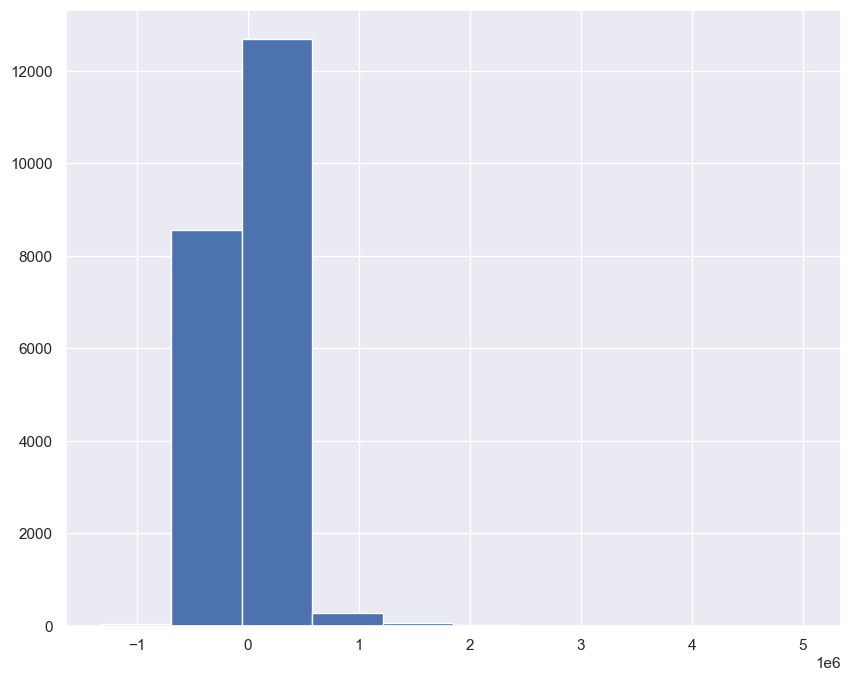

In [500]:
# residual error distribution
plt.hist(results.resid)

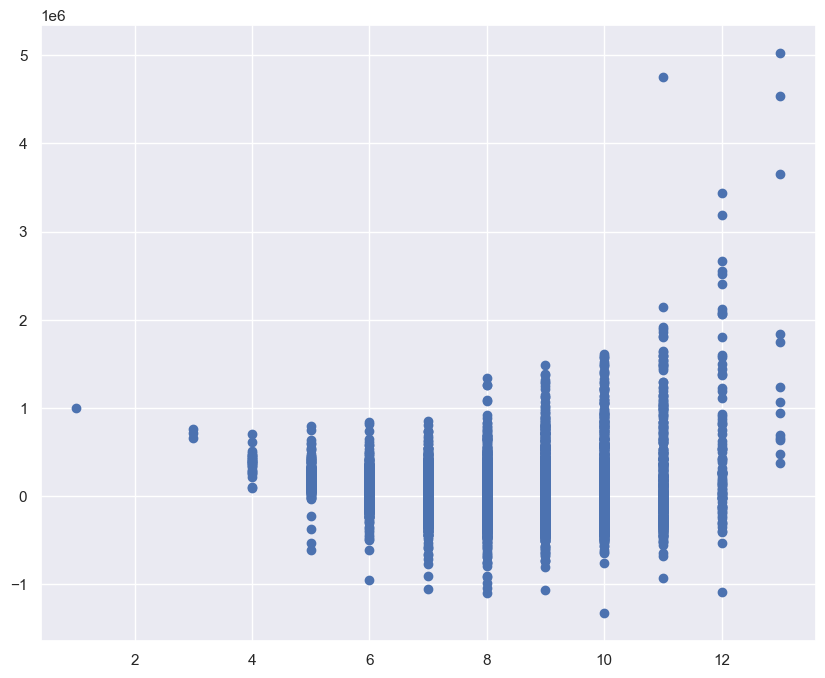

In [501]:
# check the residual plot between 'grade' and the error
plt.scatter(df_stats['grade'],results.resid)

#### As informed by the above residual plot, since the spreads of residual errors are not equal between grades but increase as the grade increases, the model may be under-predicting. Also, the increasing spreads of errors with the increases in grade may imply that the model is experiencing heteroscedasticity, namely that the model cannot perform well when predicting the sale prices of the houses with high grade values as it is biased towards the houses with lower grade values. This result may be attributed to the high number of records in the dataset that have low grades (as around 75% of houses are having grade less than or equal to 8)

Now, let check the Q-Q plot

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]),
  array([-1321132.93026292, -1096977.86468026, -1089921.26228054, ...,
          4532873.48526835,  4754980.71842734,  5026154.52555334])),
 (189489.98469739864, 1.176194456472834e-06, 0.8797833943280572))

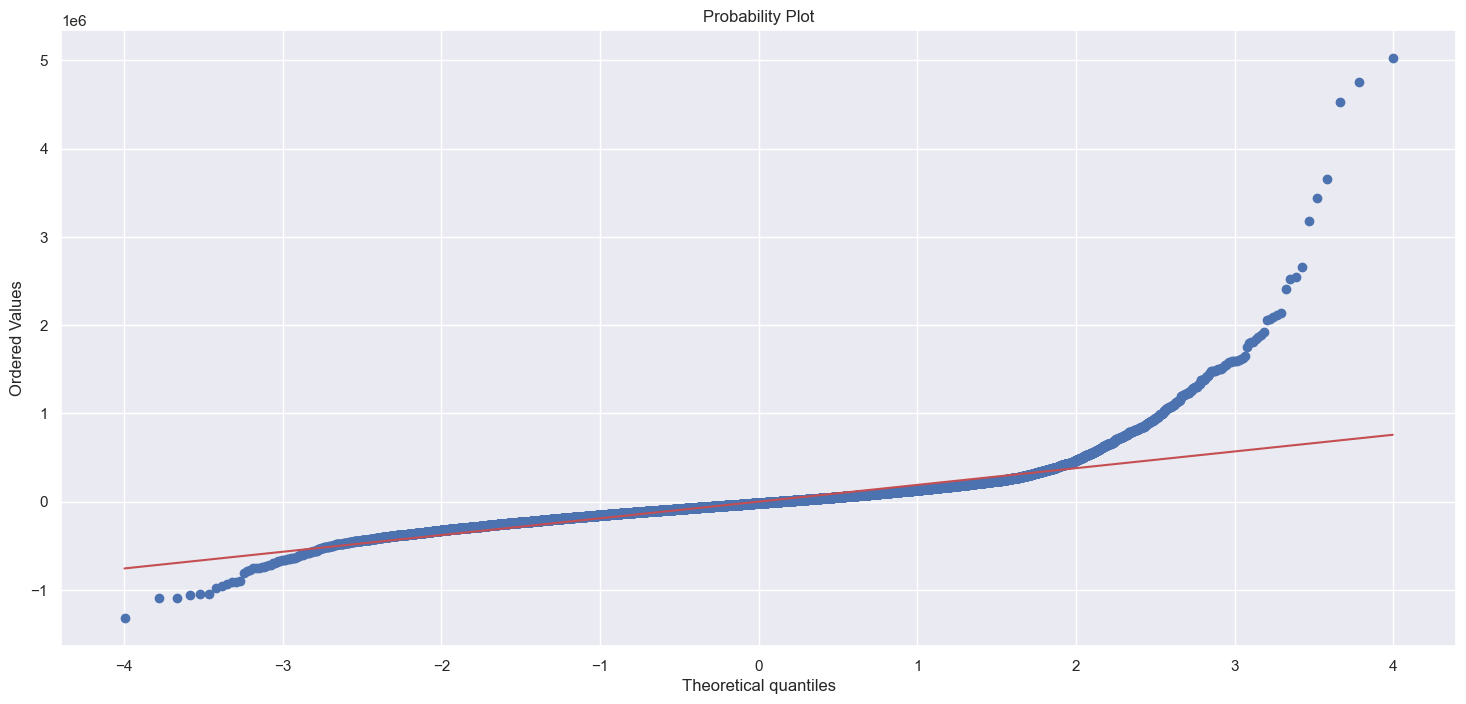

In [503]:
import scipy.stats as stats
sns.set(rc={'figure.figsize':(18,8)})
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(results.resid, dist='norm', plot=ax)

# ideally all errors should be on the red-line
# not on the red line means errors are not normally distributed


#### As shown by above probability distribution of the residual errors, it is intuitive that the errors are not normally distributed (as the errors are diverging from the red line) when the theoretical (normal distribution) quantiles > 2 or < -3, implying that the linear model is a poor fit when the input variables have low or high values in terms of their respective variable scales (heteroscedasticity)

#### This also indicates that our previous conclusion (the model is biased towards the houses with lower grade values) can be generalized to that the model is biased towards the houses that have small to medium values across all the variable scales.

Now, let check the influence / leverage plot

In [162]:
# takes some time as it computes every record for every input variable (namely this plot check how the linear model works with or without each of the record)

# COMMENT OUT BELOW 2 LINE TO REPLICATE THE CELL RESULT (> 5min runnning time, Mac M2 Pro chip)
# infl = results.get_influence()
# infl.summary_frame().sort_values("cooks_d",ascending=False) # display the records with highest cooks distance (high influence records)

# identify important / influencial records using this methods


,dfb_Intercept,dfb_bedrooms,dfb_bathrooms,dfb_floors,dfb_waterfront,dfb_condition,dfb_grade,dfb_sqft_basement,dfb_yr_built,dfb_yr_renovated,...,dfb_low,dfb_medium,dfb_high,dfb_premium,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
3914,3.527317e-01,-5.270277e-02,3.746920e-02,2.012742e-01,2.173608e+00,-1.922305e-01,1.724573e-01,6.053357e-01,-2.502382e-01,4.614007e-01,...,3.590636e-01,3.688792e-01,3.548008e-01,3.185123e-01,3.502106e-01,22.212704,0.012615,2.510735e+00,22.470363,2.539859e+00
7252,1.236936e-01,-4.654208e-01,9.538057e-01,1.984592e-01,-1.118194e-01,-6.071028e-02,7.650052e-02,6.173132e-01,-7.763221e-01,3.726859e-01,...,1.197297e-01,1.196877e-01,1.372856e-01,1.173389e-01,2.327810e-01,23.419862,0.007581,2.046963e+00,23.722506,2.073415e+00
9254,9.228973e-03,-1.717980e-01,1.104160e+00,-4.930511e-01,-8.785210e-01,-1.897268e-01,4.491523e-03,-4.794839e-01,-3.901452e-01,-2.498703e-01,...,2.739798e-04,3.395823e-04,8.263678e-04,4.335221e-02,2.062776e-01,21.128476,0.008249,1.926914e+00,21.349801,1.947099e+00
1448,1.286052e-01,-4.566356e-02,2.075092e-01,-8.985852e-02,-6.578911e-01,-1.038355e-01,9.570601e-02,-1.760488e-02,-6.340699e-02,-9.129406e-02,...,1.217943e-01,1.219811e-01,1.224252e-01,1.543398e-01,7.853644e-02,16.016965,0.005480,1.188973e+00,16.112583,1.196070e+00
1315,4.994643e-02,-5.032813e-03,2.202262e-01,-1.186921e-02,7.176158e-01,8.205142e-03,3.012765e-02,1.834790e-01,-9.772956e-02,-1.518380e-01,...,4.941523e-02,4.921548e-02,4.779358e-02,5.271766e-02,6.693008e-02,12.402129,0.007772,1.097607e+00,12.446244,1.101511e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,3.775708e-07,8.854337e-07,2.236552e-08,-3.749620e-07,7.609818e-08,-5.321894e-07,-7.886654e-07,5.892909e-07,4.173497e-07,-5.625188e-08,...,3.762253e-07,3.777320e-07,3.777370e-07,3.769145e-07,2.151566e-13,0.000081,0.000594,1.967948e-06,0.000081,1.967902e-06
11543,-1.867569e-07,-1.989182e-07,-1.182884e-07,3.024161e-07,-6.658586e-09,2.767324e-07,2.233789e-07,-6.630425e-08,-1.240767e-07,3.854708e-08,...,-1.862253e-07,-1.866446e-07,-1.865369e-07,-1.868877e-07,3.327492e-14,-0.000047,0.000273,-7.739176e-07,-0.000047,-7.738997e-07
6883,-2.560658e-07,-1.116627e-07,-2.997385e-08,-7.257791e-08,-1.989893e-09,4.604972e-07,-1.052149e-07,-1.181350e-07,2.152706e-07,6.127678e-08,...,-2.562999e-07,-2.561683e-07,-2.556681e-07,-2.556820e-07,2.351265e-14,0.000025,0.000697,6.505595e-07,0.000025,6.505444e-07
20217,-2.418433e-08,-9.151500e-08,6.411718e-10,7.513150e-08,2.946653e-09,1.202340e-08,-4.555370e-08,3.368116e-08,6.775326e-08,1.071917e-08,...,-2.389157e-08,-2.435861e-08,-2.433955e-08,-2.421069e-08,1.467480e-14,0.000022,0.000534,5.139517e-07,0.000022,5.139398e-07


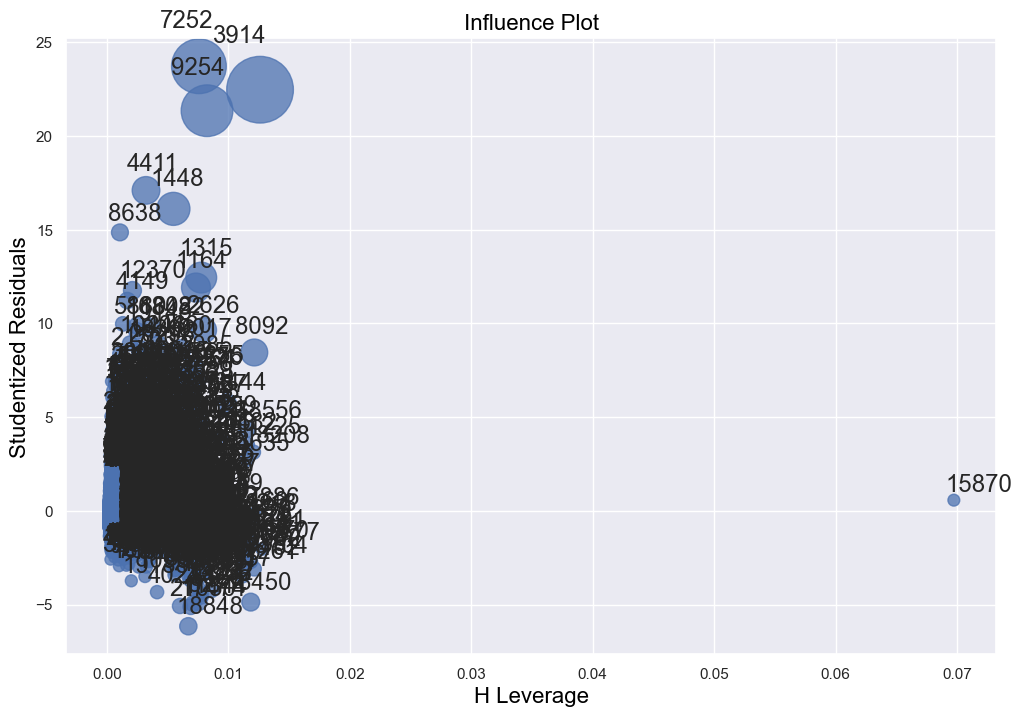

In [145]:
# COMMENT OUT BELOW 2 LINE TO REPLICATE THE CELL RESULT (> 5min runnning time, Mac M2 Pro chip)
# fig, ax = plt.subplots(figsize= (12,8))
# fig = sm.graphics.influence_plot(results,ax=ax,criterion='cooks')

# number on the point is the row index of the record

In [152]:
# Use 'cooks_d' to check if a record has high residual and high influence. 
# If 'cooks_d' is closer to 1, then you should remove that record as it has high residual and high influence

df_stats[infl.summary_frame()['cooks_d']>0.1] 

,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price,worst,low,medium,high,premium
3914,5,4.50,2.0,1,3,11,2360,1940,1,98004,47.6500,-122.214,7062500.0,0,0,1,0,0
7252,6,8.00,2.5,0,4,13,3480,1910,1,98102,47.6298,-122.323,7700000.0,0,0,0,1,0
9254,6,7.75,2.0,0,3,13,1030,2001,0,98039,47.6305,-122.240,6885000.0,0,0,0,0,1


In [160]:
# check the record that have high leverage
# as leverage is a measure of how extreme the input variable values are 
# leverage value is stored in the attribute 'hat_diag'

#df_stats.iloc[15870]
#print(infl.summary_frame()[infl.summary_frame()['hat_diag']>0.05]['cooks_d'])

df_stats[infl.summary_frame()['hat_diag']>0.05] 


,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price,worst,low,medium,high,premium
15870,33,1.75,1.0,0,5,7,580,1947,0,98103,47.6878,-122.331,640000.0,1,0,0,0,0


#### As indicated by the above influence / leverage plot, there is no record being 'outlier' as there is no circle on the top-right of the influence / leverage plot (implying no record has both high residual and high influence in this case), meaning that no record is needed to be dropped from the training set to maintain the model robustness. In addition, most of the data records are concentrated on the bottom-left of the graph, with a few exceptions on the top-left. The top 3 left records are identified by checking their computed 'cooks_d' attribute values as their high residual error values are reflected in 'cooks_d'. It is noteworthy that the 3 records are the top 3 most expensive houses in the dataset (the max of 'price' is 7700000, which is the house with index being 7252) and have 'grade' > 11. This may explain why the linear model produces high residual errors when predicting this 3 houses as the model is biased towards the houses with smaller variable values as we concluded before 

#### Moreover, as leverage is a measure of how extreme the input variable values are, the only one bottom-right record (with index being 15870) on the influence / leverage plot is displayed, and it has 33 bedrooms in it with only 1.75 bathroom, which is likely a noise / errored data record that we may consider to drop. However, as this record does not yield a high residual error or influence (small circle size), it should also be acceptable to just keep it

Now, let's try if feature engineering on the 'date' feature can improve the accuracy of the model or not

#### Since the housing market trend varies from year to year, it may be advisable to extract the year of sale of the houses as an input variable and see if it is a useful feature to include or not (can it improve the current linear model performance?)

In [504]:
# Transform 'date' to a datetime data format as pandas assume 'datetime' to be string at the start
# you need to convert it into datetime manually
df_year = pd.concat([df[independent_feature + target_feature + ['date']], dummies_view],axis=1)
df_year['date'] = pd.to_datetime(df['date']) 
df_year['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [505]:
# Extract year into new columns
df_year['year'] = df_year['date'].dt.year
df_year.year

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: year, Length: 21613, dtype: int32

In [506]:
results_year = ols("price ~ year + bedrooms + bathrooms	+ floors + waterfront + condition + grade + sqft_basement + yr_built + yr_renovated	+ zipcode + lat + long + worst + low + medium + high + premium", 
              data=df_year).fit() 
print(results_year.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     2437.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:54:04   Log-Likelihood:            -2.9603e+05
No. Observations:               21613   AIC:                         5.921e+05
Df Residuals:                   21595   BIC:                         5.922e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.038e+07   5.84e+06     -3.488

#### As shown above, though 'year' may be an important feature to the model as it has a p-value less than 0.05, it only increments the R-squared value by 0.001 from 0.656 to 0.657, which fails to improve the model performance significantly but increase the risks of overfitting, thus it may be sensible to remain using the selected features we have used to produce the visualizations like the Q-Q plot before

# Pipleline Model Training
Note: No dimensionality reduction strategy should be used in this case to preserve the model interpretability (as the model results must be explained to a business executive who may have little technical background)

In [507]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler

In [508]:
# Step 1: identify independent & dependent variables (never hard-code anything in pipeline)
# note: we do not have categorical features in this case, so we will not use onehot encoder
features = df_stats.columns.to_list()
features.remove('price')
target = 'price'
df_stats[features]


,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,worst,low,medium,high,premium
0,3,1.00,1.0,0,3,7,0,1955,0,98178,47.5112,-122.257,1,0,0,0,0
1,3,2.25,2.0,0,3,7,400,1951,1,98125,47.7210,-122.319,1,0,0,0,0
2,2,1.00,1.0,0,3,6,0,1933,0,98028,47.7379,-122.233,1,0,0,0,0
3,4,3.00,1.0,0,5,7,910,1965,0,98136,47.5208,-122.393,1,0,0,0,0
4,3,2.00,1.0,0,3,8,0,1987,0,98074,47.6168,-122.045,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,3.0,0,3,8,0,2009,0,98103,47.6993,-122.346,1,0,0,0,0
21609,4,2.50,2.0,0,3,8,0,2014,0,98146,47.5107,-122.362,1,0,0,0,0
21610,2,0.75,2.0,0,3,7,0,2009,0,98144,47.5944,-122.299,1,0,0,0,0
21611,3,2.50,2.0,0,3,8,0,2004,0,98027,47.5345,-122.069,1,0,0,0,0


In [509]:
X_train, X_test, y_train, y_test = train_test_split(df_stats[features], df_stats[target], 
                                                    test_size=0.3, random_state=1234)
# 30% data are used for testing
# use random_state to ensure your train_test partition is replicable (same train & test sets every time)

In [510]:
# Step 2: Preprocessing
# minMaxScaler for features 
# (minMaxScaler ensure the feature to range between 0 and 1, preserving the original distribution of the features)
num_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

In [511]:
# still in building the pipeline
preprocessor = ColumnTransformer(transformers=[('num',num_transformer,features)])

## Ordinary Least Squares Regression

In [512]:
# model pipeline building finished 
linear_reg =  Pipeline(steps=[
    ('preprocessor', preprocessor), # do the pre-processing first on all the input data
    ('regressor', LinearRegression()) # then fit the model on the pre-processed data
])
linear_reg.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'floors', 'waterfront',
                                                   'condition', 'grade',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long', 'worst',
                                                   'low', 'medium', 'high',
                                                   'premium'])])),
                ('regressor', LinearRegression())])

In [513]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
pred = linear_reg.predict(X_train)

print("Training RMSE for Ordinary Least Squares Regression: ",np.sqrt(mean_squared_error(y_train, pred)))
print("Training R-Squared for Ordinary Least Squares Regression: ",r2_score(y_train, pred))
print()

pred = linear_reg.predict(X_test)
print("Tesing RMSE for Ordinary Least Squares Regression: ",np.sqrt(mean_squared_error(y_test, pred)))
print("Testing R-Squared for Ordinary Least Squares Regression: ",r2_score(y_test, pred))


Training RMSE for Ordinary Least Squares Regression:  217177.71578334452
Training R-Squared for Ordinary Least Squares Regression:  0.655386201618347

Tesing RMSE for Ordinary Least Squares Regression:  211400.6959097621
Testing R-Squared for Ordinary Least Squares Regression:  0.6559594690519528


((array([-3.70213724, -3.47078436, -3.34347054, ...,  3.34347054,
          3.47078436,  3.70213724]),
  array([-1141984., -1128736., -1018536., ...,  1890152.,  4476936.,
          4736484.])),
 (187188.88252222148, 119.11937075879086, 0.8850017946391187))

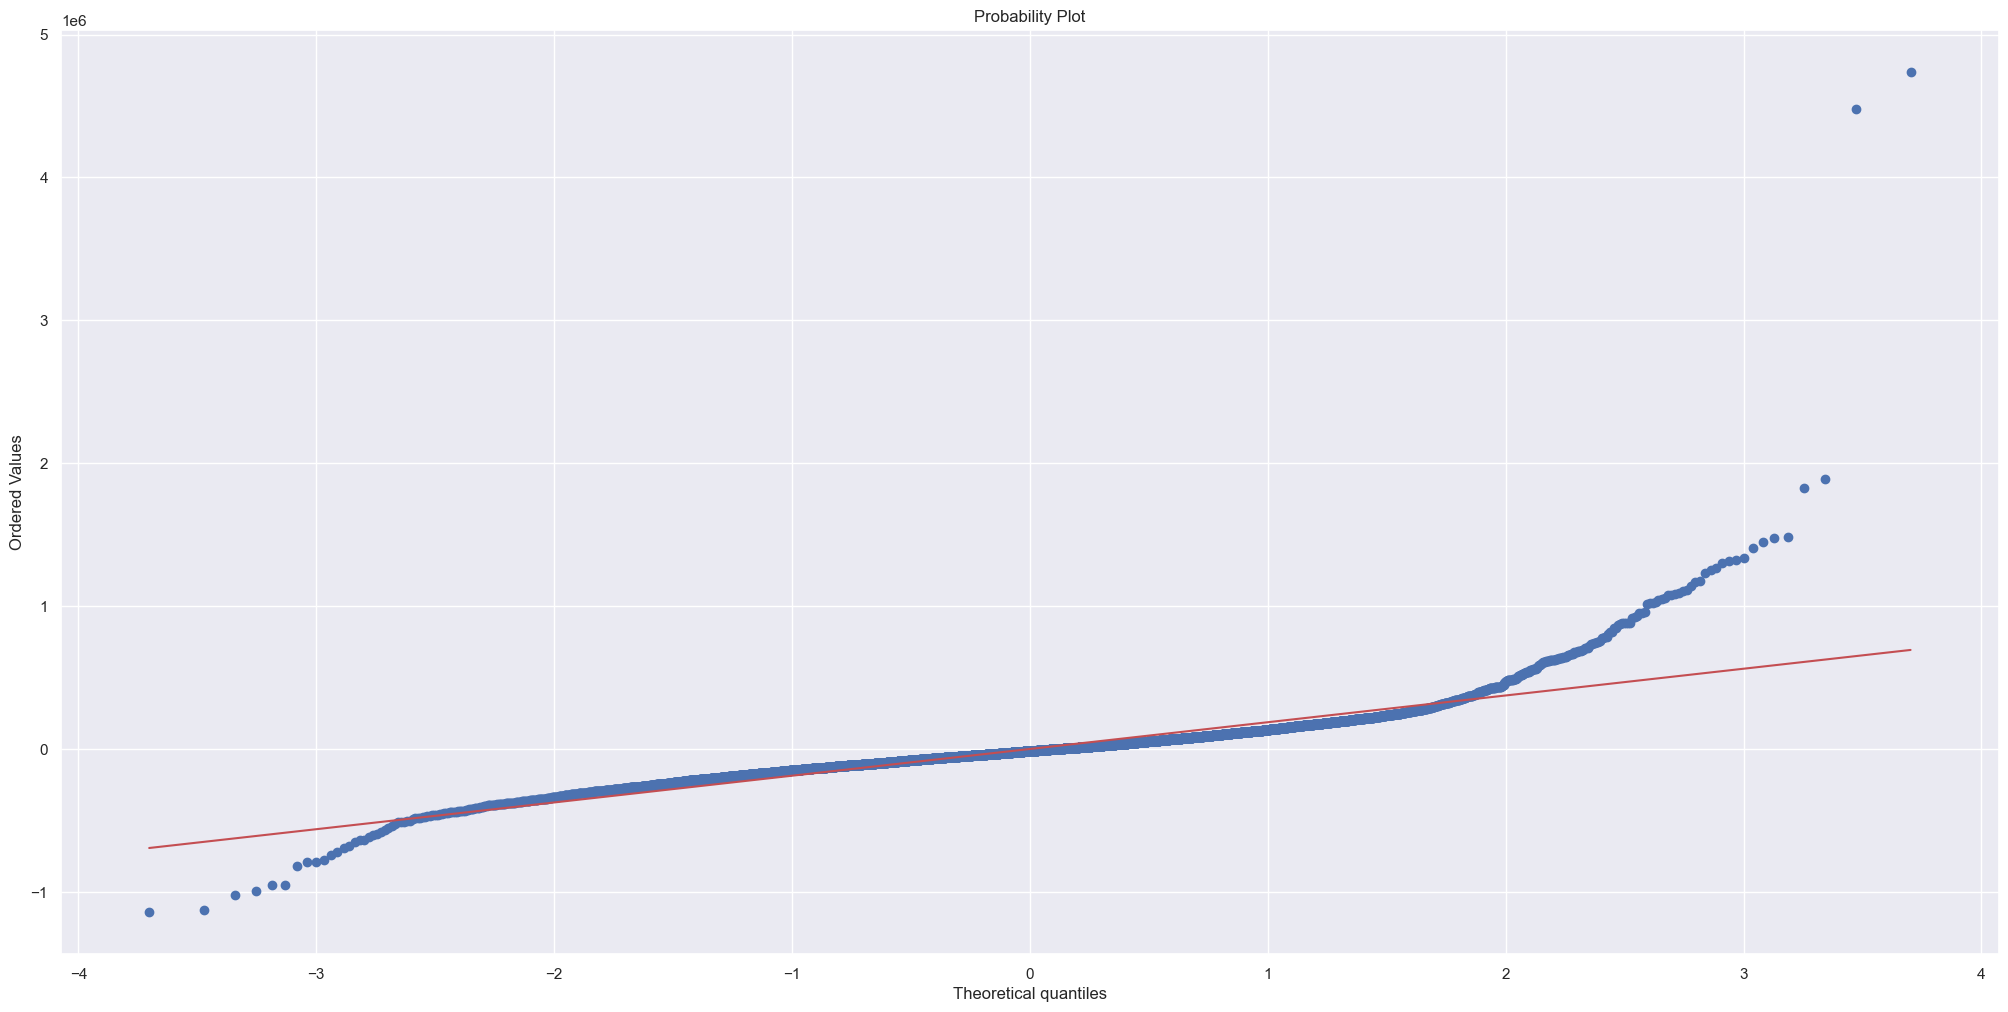

In [439]:
# Residual plot for testing set
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(y_test - linear_reg.predict(X_test), dist='norm', plot=ax)

               feature_importance
grade                1.695072e+06
bathrooms            8.351831e+05
waterfront           5.259793e+05
lat                  3.493171e+05
sqft_basement        2.996794e+05
condition            8.728469e+04
floors               8.118451e+04
yr_renovated         3.317487e+04
long                -5.690119e+04
bedrooms            -7.531294e+04
zipcode             -1.250282e+05
yr_built            -4.008948e+05
premium             -1.099981e+18
high                -1.099981e+18
low                 -1.099981e+18
medium              -1.099981e+18
worst               -1.099981e+18


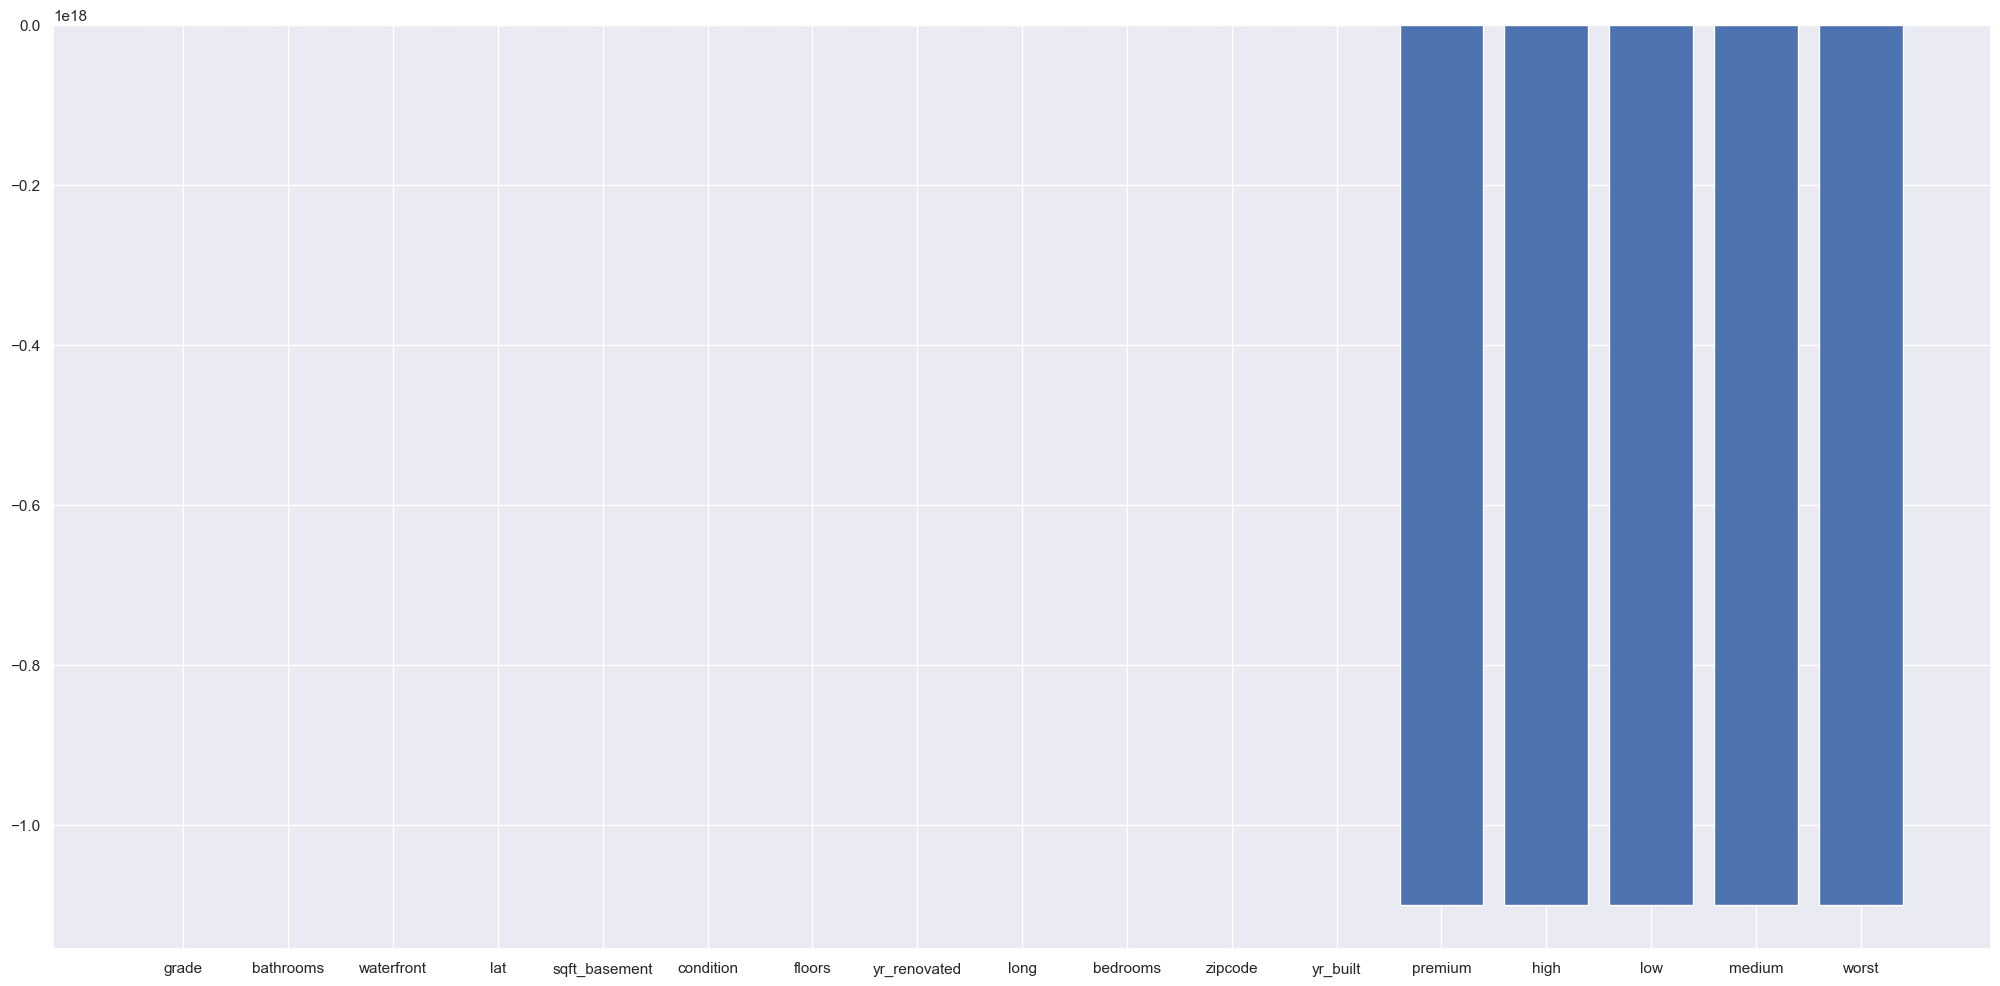

In [440]:
# get importance as a dataframe

importance = pd.DataFrame(linear_reg['regressor'].coef_, columns=['feature_importance'], index=X_train.columns)
# summarize feature importance
importance.sort_values('feature_importance', ascending = False, inplace=True)
print(importance)
# plot feature importance
plt.bar( importance.index, importance['feature_importance'])
plt.show()

#### As shown above, the training RMSE of Ordinary Least Squares Regression (217177) is similar to the training RMSE (215344) we obtained before by using the 'statsmodels' library, implying that the previous conclusions (ex: the model is biased towards the houses with lower variable values) are still valid to the linear model trained by using the sklearn library. Moreover, as the testing RMSE is slightly smaller than the training RMSE, there is no overfitting for the Ordinary Least Squares Regression

#### Also, the coefficients the linear model assigned to the input features are displayed as the feature importances, because the input data have been normalized by the MinMaxScaler() and the high magnitudes of coefficients indicate high influences of the associated features on the linear model price predictions. However, for the Ordinary Least Squares Regression in this case, it has assigned excessively high and the same weights to the 5 dummy variables of 'view', implying that the model is over-emphasizing the influence of the 'view' attribute (downplaying other important features) and doesn't differentiate the impacts of different 'view' values on the house sale price, compromising the reliability and the interpretability of the Ordinary Least Squares Regression model 

## Ridge

In [380]:
ridge_reg =  Pipeline(steps=[
    ('preprocessor', preprocessor), # do the pre-processing first on all the input data
    ('regressor', Ridge(alpha=1.0)) # then fit the Ridge model on the pre-processed data
    # hyper-parameter alpha = 1 means how much to penalize the coefficients assigned to the features in each iteration
    # values for alpha is [0, +inf]
])

ridge_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'floors', 'waterfront',
                                                   'condition', 'grade',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long', 'worst',
                                                   'low', 'medium', 'high',
                                                   'premium'])])),
                ('regressor', Ridge())])

In [441]:
pred = ridge_reg.predict(X_train)
print("Training RMSE for Ridge: ",np.sqrt(mean_squared_error(y_train, pred)))
print("Training R-Squared for Ridge: ",r2_score(y_train, pred))
print()

pred = ridge_reg.predict(X_test)
print("Tesing RMSE for Ridge: ",np.sqrt(mean_squared_error(y_test, pred)))
print("Testing R-Squared for Ridge:",r2_score(y_test, pred))


Training RMSE for Ridge:  217181.5054562529
Training R-Squared for Ridge:  0.6553741747401266

Tesing RMSE for Ridge:  211343.7889510635
Testing R-Squared for Ridge: 0.6561446686801705


((array([-3.70213724, -3.47078436, -3.34347054, ...,  3.34347054,
          3.47078436,  3.70213724]),
  array([-1137504.4451632 , -1123204.4628084 , -1015570.72394683, ...,
          1892309.01827031,  4485368.63366643,  4747010.96727467])),
 (186891.9315900791, 17.70485375033787, 0.883835636411804))

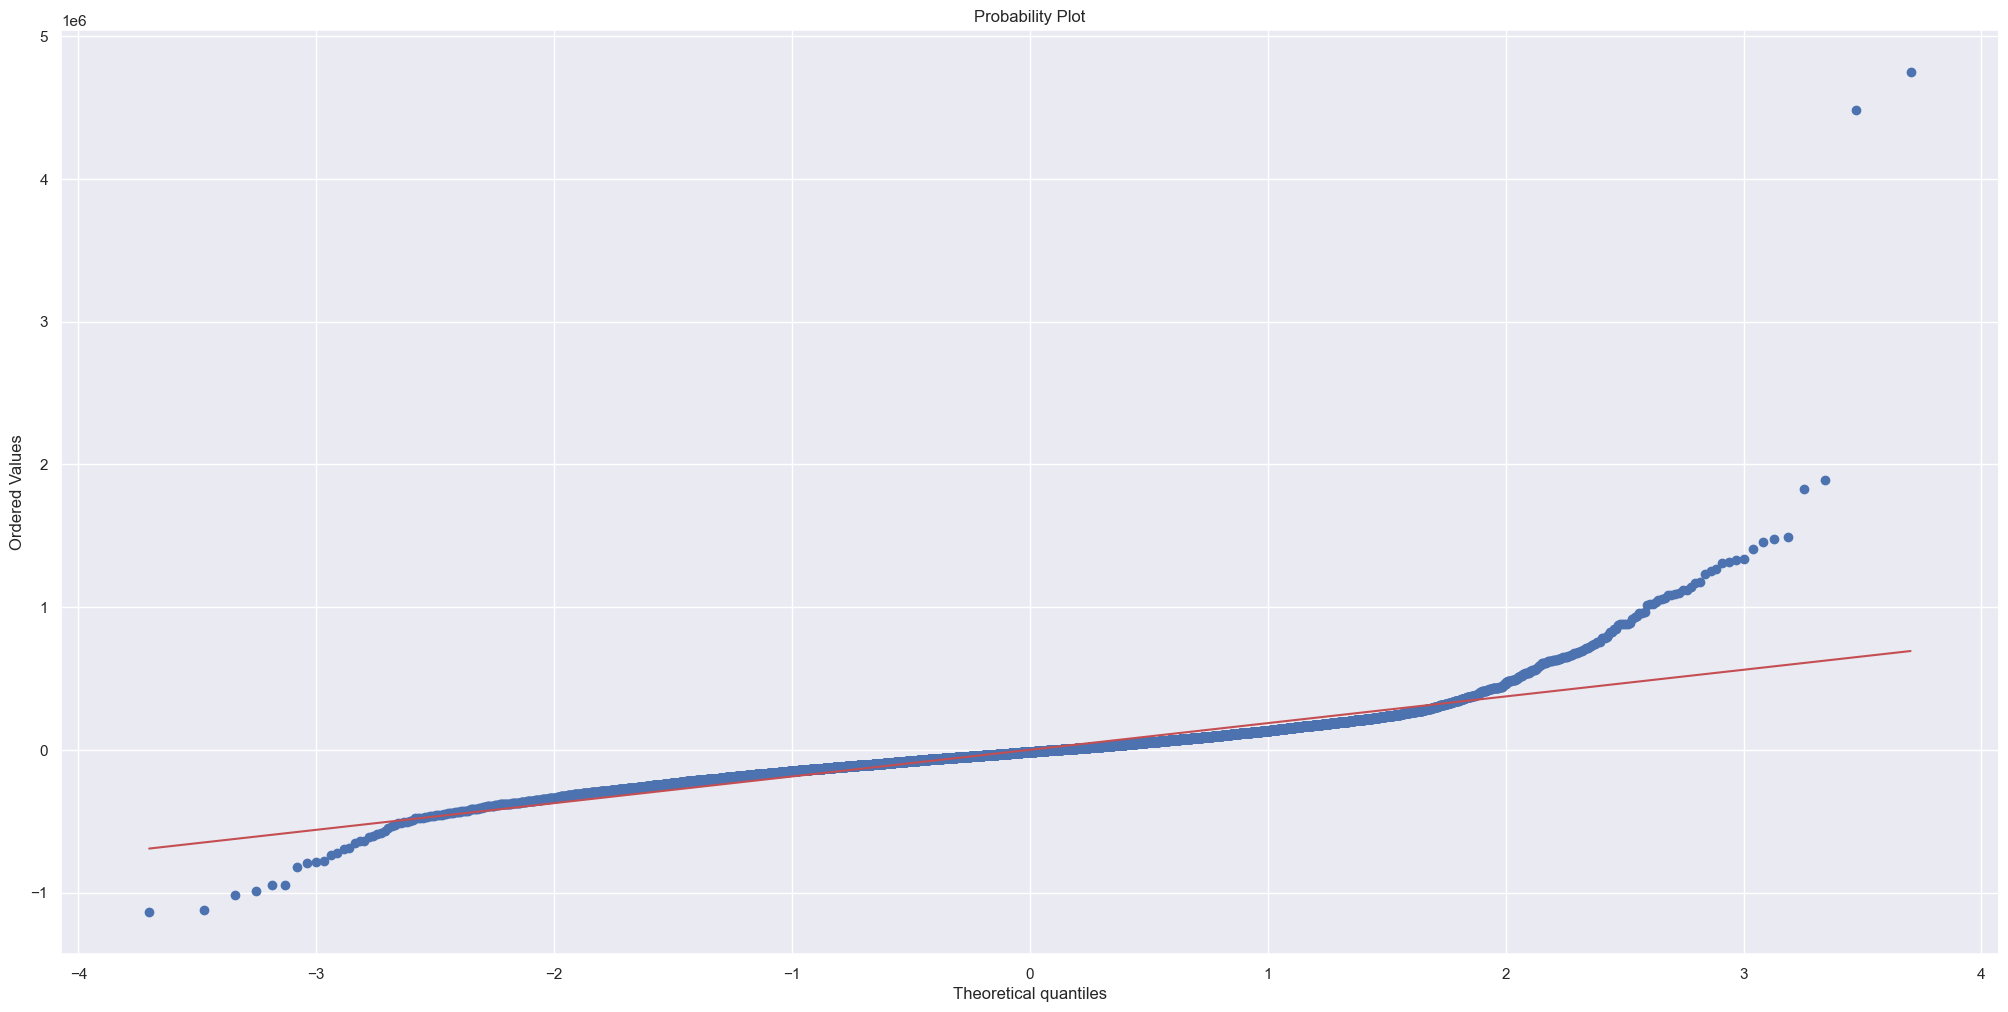

In [394]:
# Residual plot for testing set
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(y_test - ridge_reg.predict(X_test), dist='norm', plot=ax)

               feature_importance
grade                1.683421e+06
bathrooms            8.201565e+05
waterfront           5.198439e+05
lat                  3.500062e+05
sqft_basement        3.015160e+05
premium              2.370218e+05
condition            8.872504e+04
floors               8.354469e+04
yr_renovated         3.448994e+04
high                -6.631527e+03
low                 -1.785984e+04
bedrooms            -4.325267e+04
long                -5.610301e+04
medium              -5.866000e+04
zipcode             -1.249834e+05
worst               -1.538705e+05
yr_built            -3.972396e+05


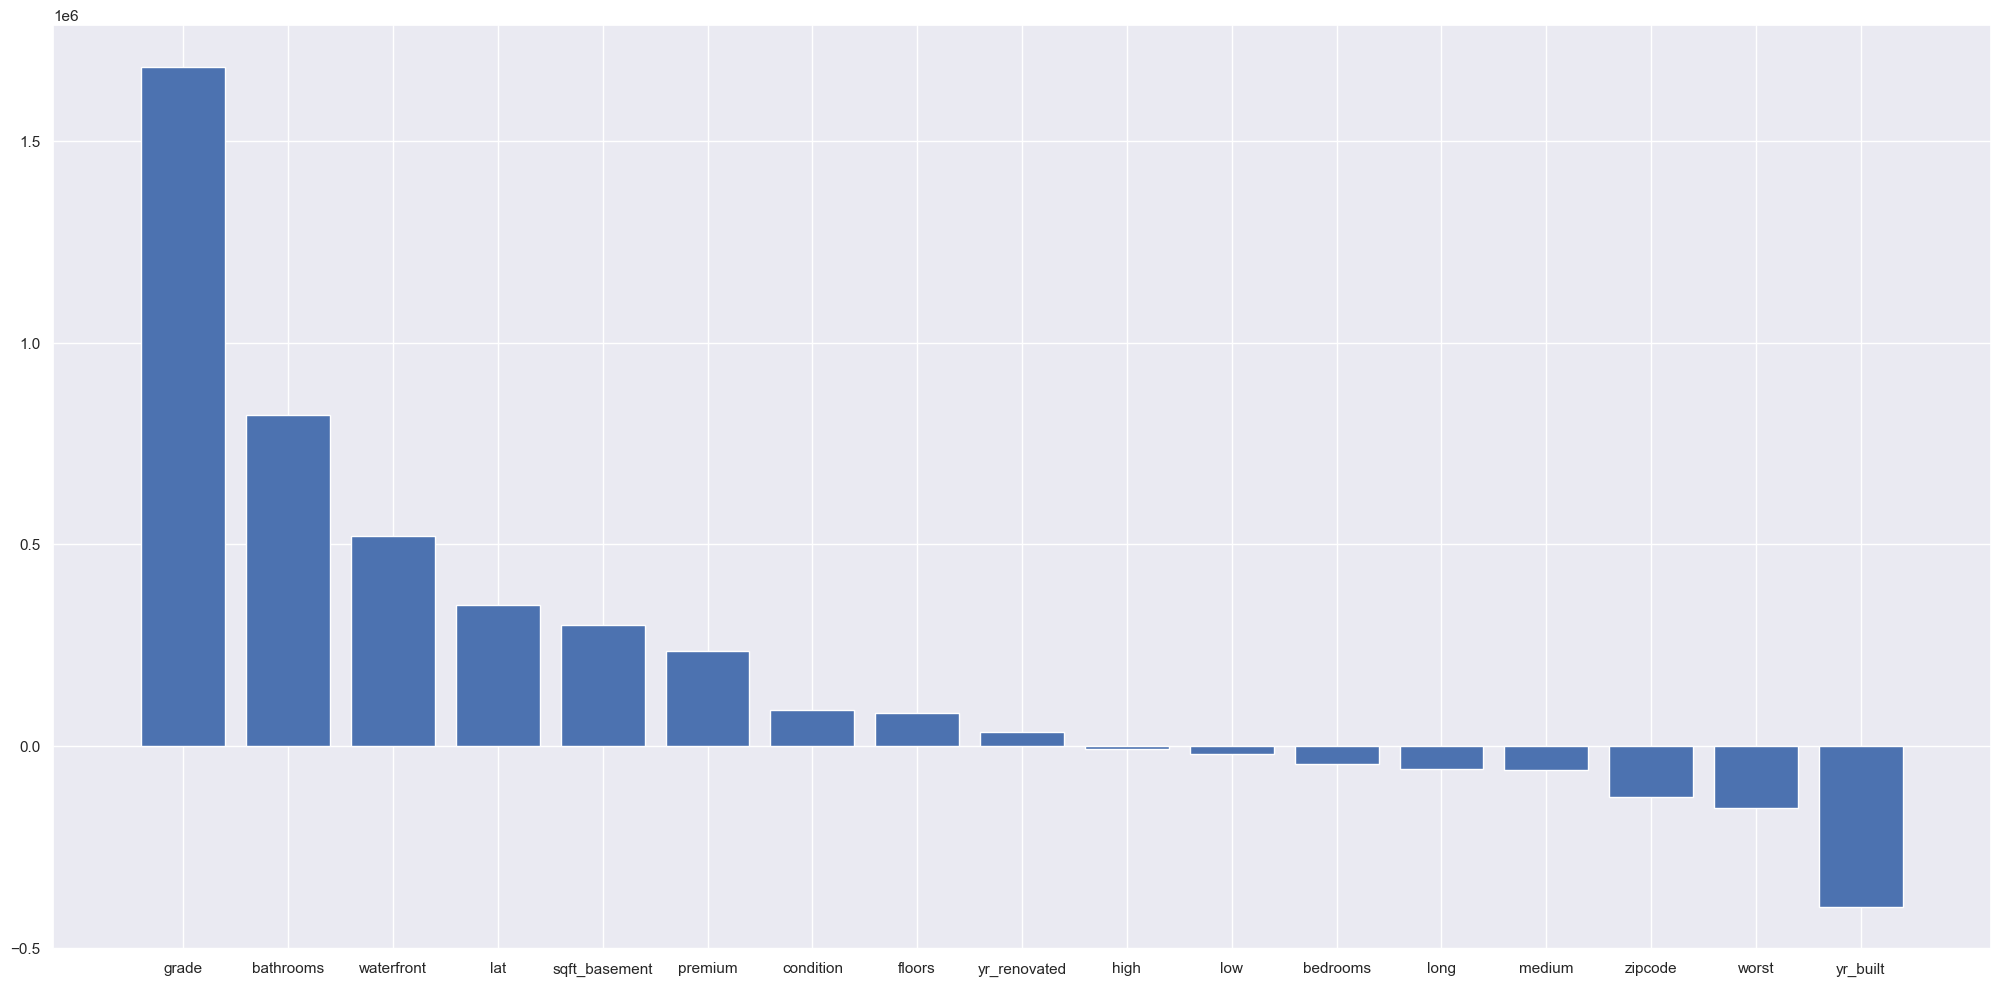

In [382]:
# get feature importance as a dataframe

importance = pd.DataFrame(ridge_reg['regressor'].coef_, columns=['feature_importance'], index=X_train.columns)
# summarize feature importance
importance.sort_values('feature_importance', ascending = False, inplace=True)
print(importance)
# plot feature importance
plt.bar( importance.index, importance['feature_importance'])
plt.show()

## Lasso

In [383]:
lasso_reg =  Pipeline(steps=[
    ('preprocessor', preprocessor), # do the pre-processing first on all the input data
    ('regressor', Lasso(alpha=1.0)) # then fit the Ridge model on the pre-processed data
    # hyper-parameter alpha = 1 means how much to penalize the coefficients assigned to the features in each iteration
    # values for alpha is [0, +inf]
])

lasso_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'floors', 'waterfront',
                                                   'condition', 'grade',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long', 'worst',
                                                   'low', 'medium', 'high',
                                                   'premium'])])),
                ('regressor', Lasso())])

In [407]:
pred = lasso_reg.predict(X_train)
print("Training RMSE for Lasso: ",np.sqrt(mean_squared_error(y_train, pred)))
print("Training R-Squared for Lasso: ",r2_score(y_train, pred))
print()

pred = lasso_reg.predict(X_test)
print("Tesing RMSE for Lasso: ",np.sqrt(mean_squared_error(y_test, pred)))
print("Testing R-Squared for Lasso: ",r2_score(y_test, pred))

Training RMSE for Lasso:  217176.73661819723
Training R-Squared for Lasso:  0.6553893090555789

Tesing RMSE for Lasso:  211392.85317697952
Testing R-Squared for Lasso:  0.6559849956273363


((array([-3.70213724, -3.47078436, -3.34347054, ...,  3.34347054,
          3.47078436,  3.70213724]),
  array([-1140178.03244502, -1128971.30113265, -1019322.66900867, ...,
          1890095.61453898,  4480047.78133384,  4738204.31550847])),
 (187126.4648904309, 36.41467961561415, 0.8847393886922162))

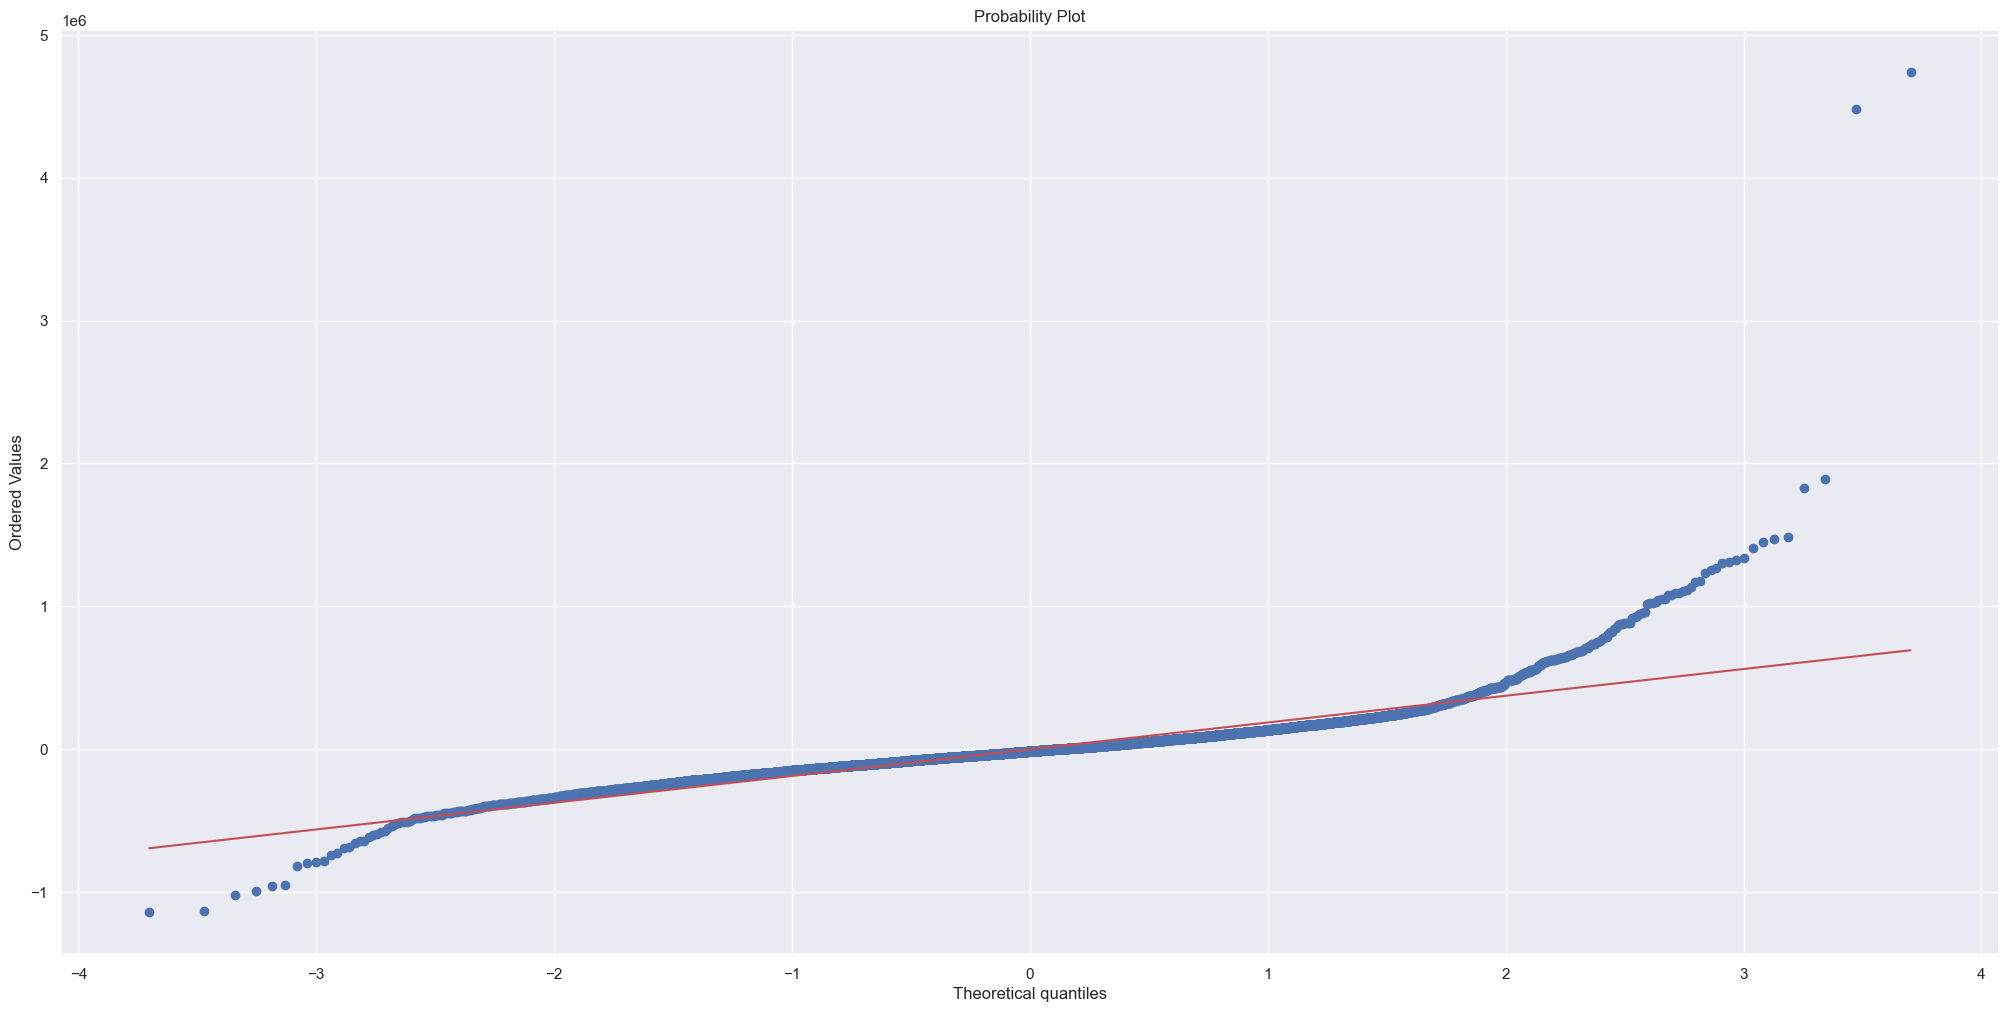

In [395]:
# Residual plot for testing set
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(y_test - lasso_reg.predict(X_test), dist='norm', plot=ax)

               feature_importance
grade                1.695583e+06
bathrooms            8.281198e+05
waterfront           5.258980e+05
lat                  3.492329e+05
sqft_basement        2.997153e+05
premium              2.421430e+05
condition            8.831035e+04
floors               8.119595e+04
yr_renovated         3.340142e+04
high                 2.099752e+01
low                 -1.029591e+04
medium              -5.131969e+04
long                -5.637901e+04
bedrooms            -6.545831e+04
zipcode             -1.248084e+05
worst               -1.453073e+05
yr_built            -4.007341e+05


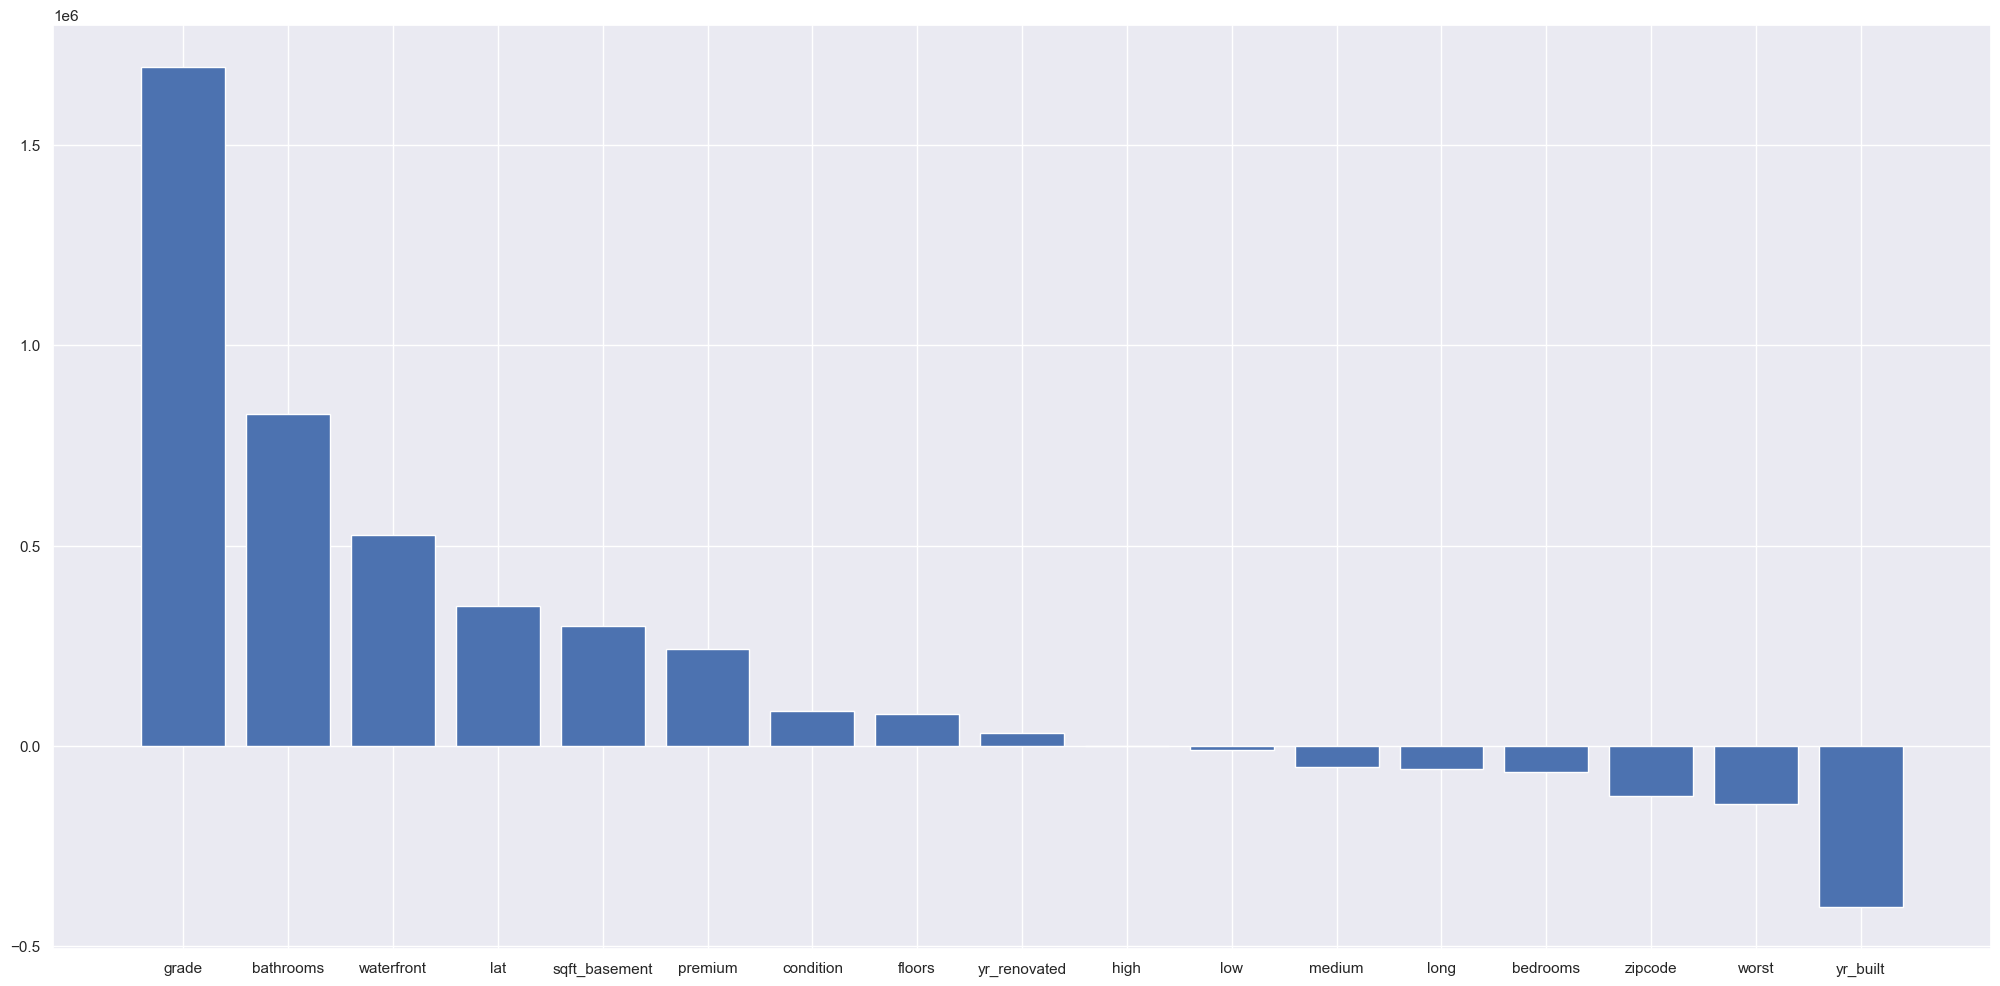

In [385]:
# get feature importance as a dataframe

importance = pd.DataFrame(lasso_reg['regressor'].coef_, columns=['feature_importance'], index=X_train.columns)
# summarize feature importance
importance.sort_values('feature_importance', ascending = False, inplace=True)
print(importance)
# plot feature importance
plt.bar( importance.index, importance['feature_importance'])
plt.show()

## Elastic Net

In [386]:
elastic_reg =  Pipeline(steps=[
    ('preprocessor', preprocessor), # do the pre-processing first on all the input data
    ('regressor', ElasticNet(alpha=0.5, l1_ratio=0.5)) # then fit the Ridge model on the pre-processed data
    # l1_ratio means how much regularization are applied based on L1 (lasso). If l1_ratio=0.5, then both regularization methods contribute evenly to the coefficient results
    
    # hyper-parameter alpha = 1 means how much to penalize the coefficients assigned to the features in each iteration
    # values for alpha is [0, +inf]
])

elastic_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'floors', 'waterfront',
                                                   'condition', 'grade',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long', 'worst',
                                                   'low', 'medium', 'high',
                                                   'premium'])])),
                ('regressor', ElasticNet(alpha=0.5))])

In [408]:
pred = elastic_reg.predict(X_train)
print("Training RMSE for Elastic Net: ",np.sqrt(mean_squared_error(y_train, pred)))
print("Training R-Squared for Elastic Net: ",r2_score(y_train, pred))
print()

pred = elastic_reg.predict(X_test)
print("Tesing RMSE for Elastic Net: ",np.sqrt(mean_squared_error(y_test, pred)))
print("Training R-Squared for Elastic Net: ",r2_score(y_test, pred))

Training RMSE for Elastic Net:  335733.3687075221
Training R-Squared for Elastic Net:  0.1764477521811435

Tesing RMSE for Elastic Net:  324851.55496420973
Training R-Squared for Elastic Net:  0.18760604372341105


((array([-3.70213724, -3.47078436, -3.34347054, ...,  3.34347054,
          3.47078436,  3.70213724]),
  array([-513657.39919121, -452117.5479253 , -433011.99077814, ...,
         2874938.43870027, 6081842.06910104, 6254491.94905203])),
 (269882.59732657456, -839.656497432173, 0.8303512146995068))

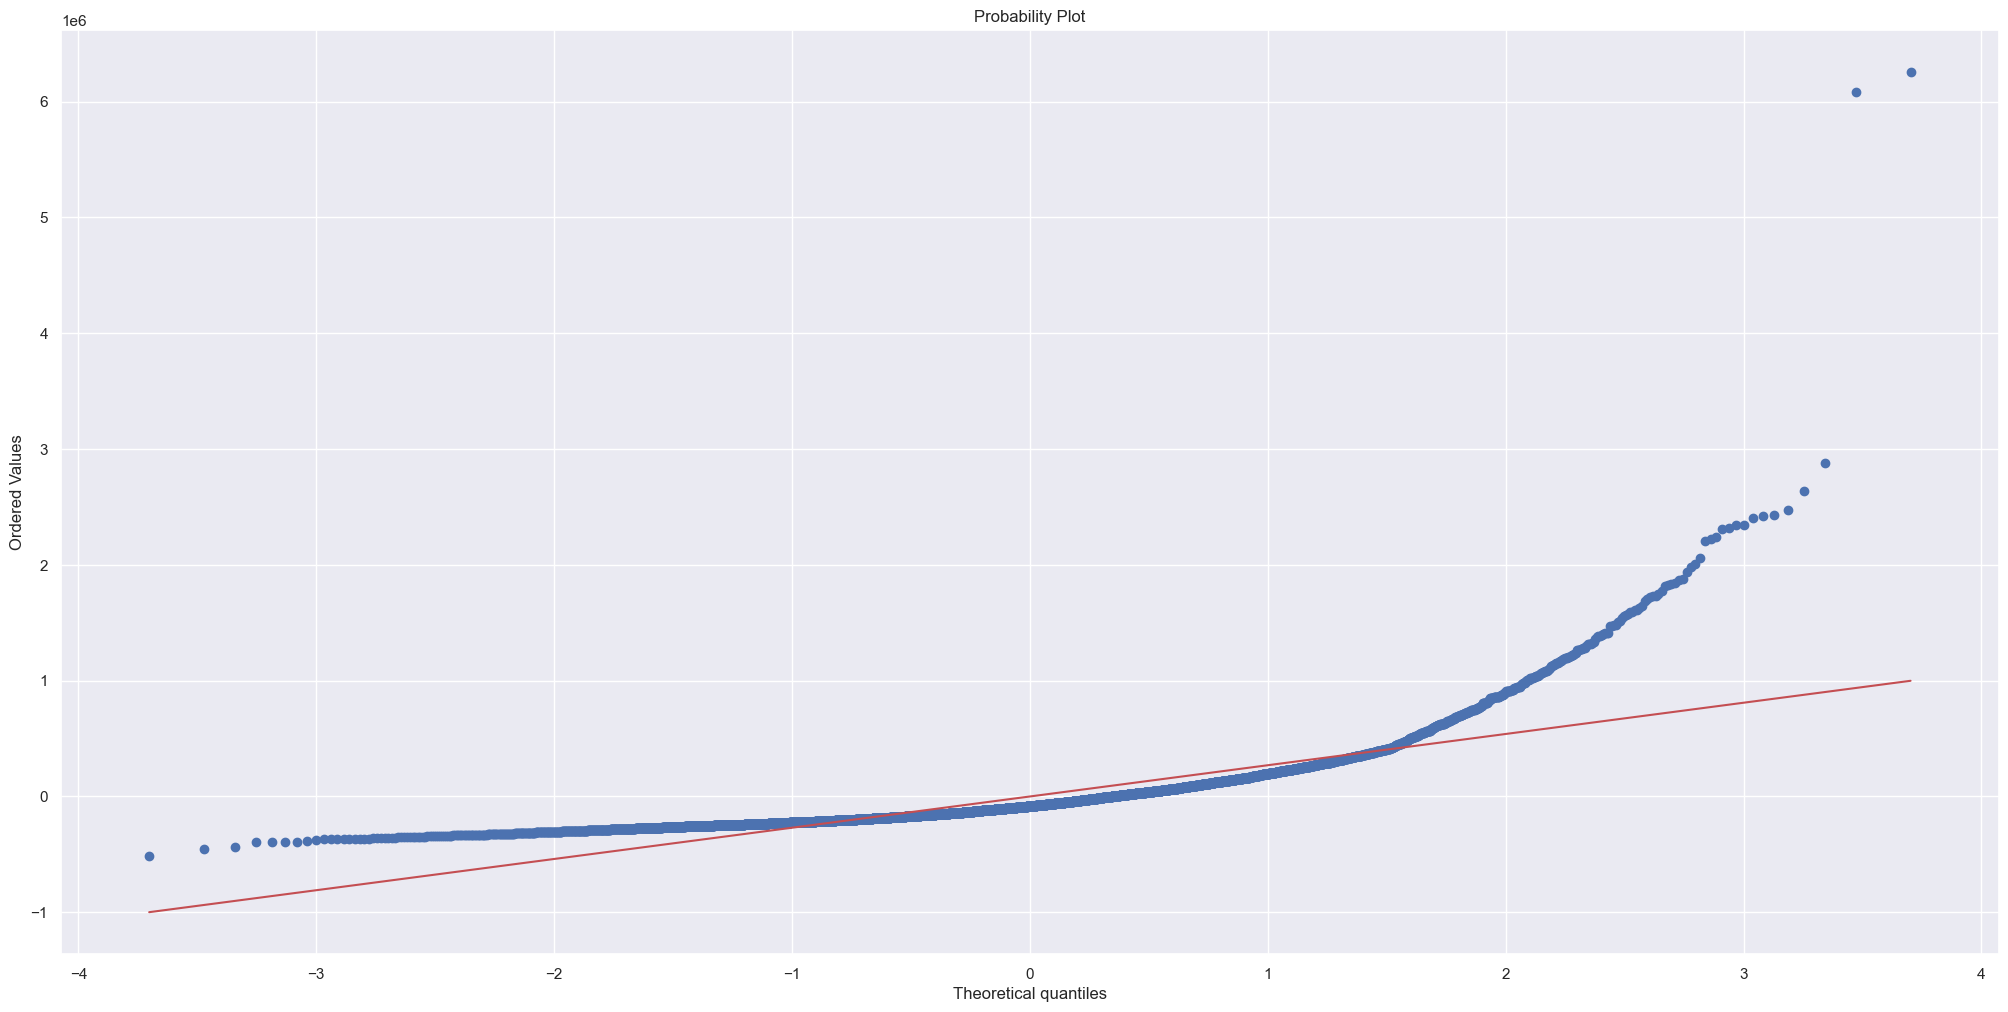

In [396]:
# Residual plot for testing set
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(y_test - elastic_reg.predict(X_test), dist='norm', plot=ax)

               feature_importance
grade                99358.748162
lat                  82346.798609
bathrooms            62749.902859
floors               61868.468732
premium              42877.915128
sqft_basement        38261.139544
yr_renovated         30031.610078
waterfront           27430.943176
high                 25732.186838
medium               23763.766339
bedrooms             11196.982618
condition            10493.211928
low                  10413.532379
yr_built              8850.737595
long                  2619.291780
zipcode             -20946.703366
worst              -102790.400955


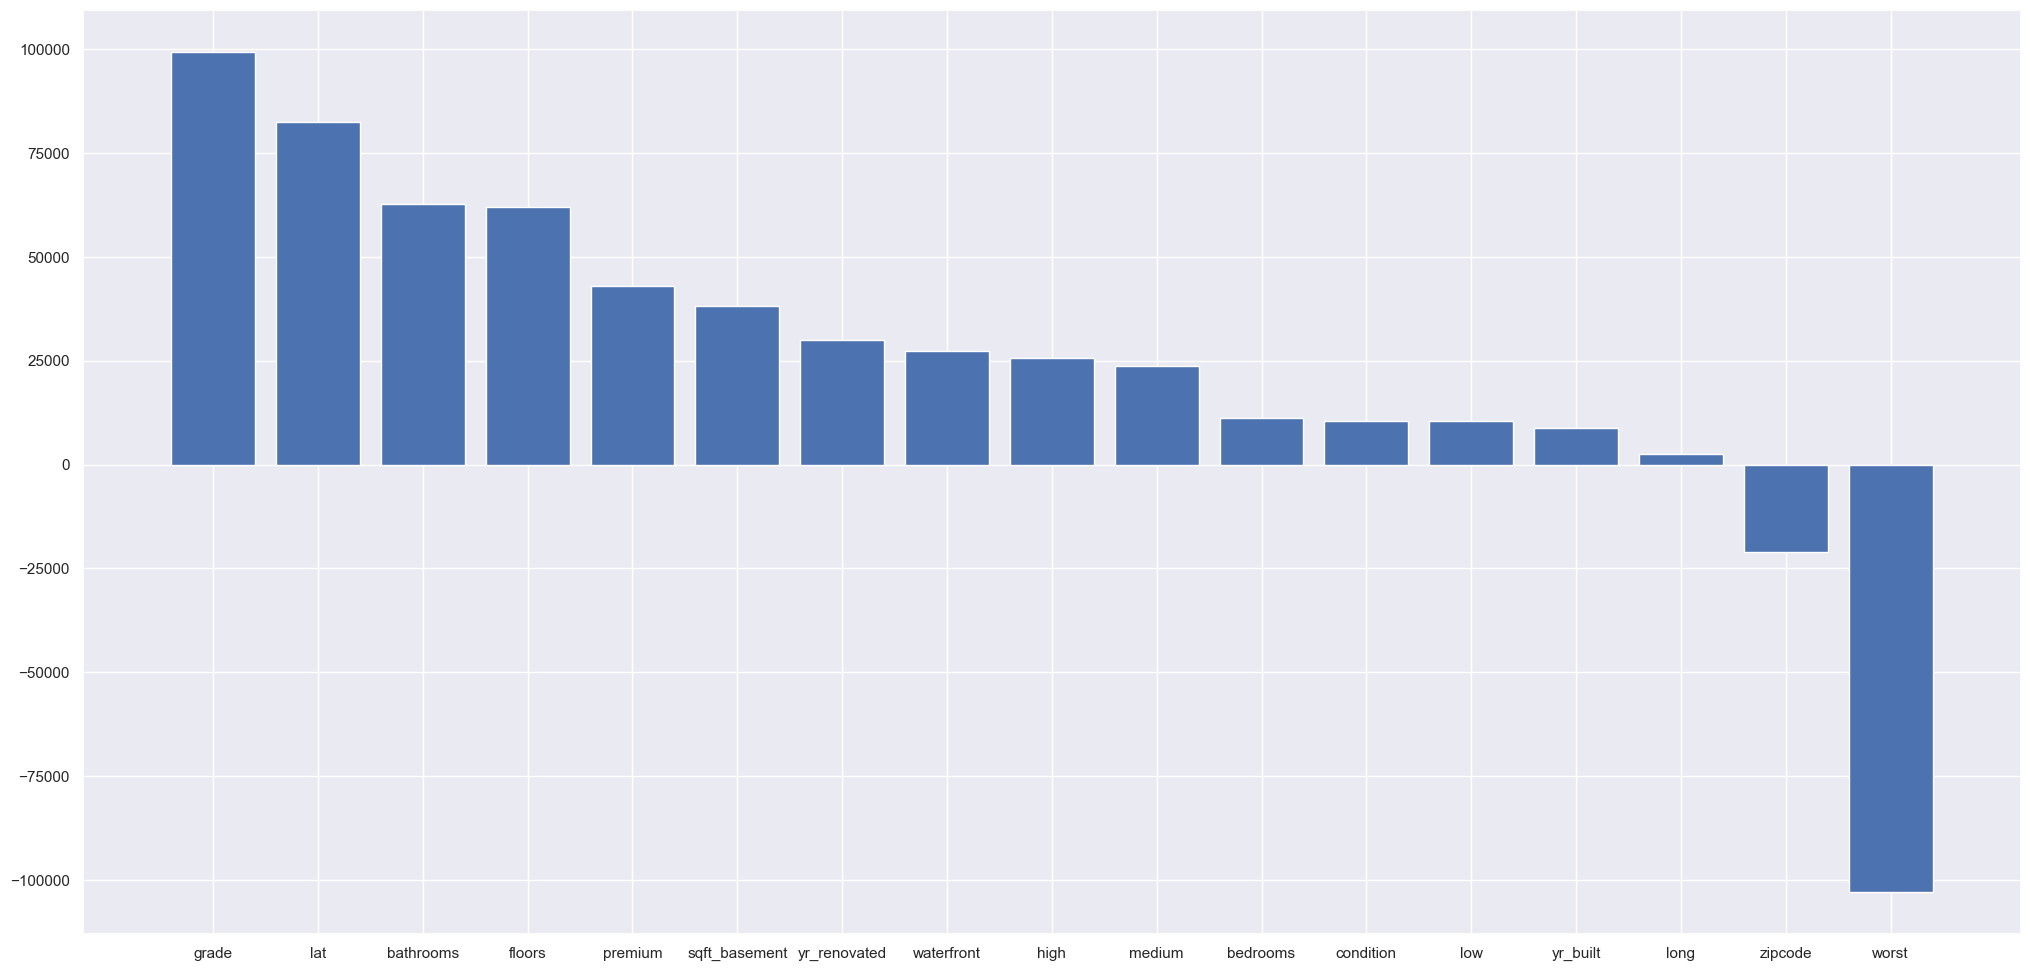

In [388]:
# get importance as a dataframe

importance = pd.DataFrame(elastic_reg['regressor'].coef_, columns=['feature_importance'], index=X_train.columns)
# summarize feature importance
importance.sort_values('feature_importance', ascending = False, inplace=True)
print(importance)
# plot feature importance
sns.set(rc={'figure.figsize':(25,12)})
plt.bar( importance.index, importance['feature_importance'])
plt.show()

##### Conclusion: All the 4 linear models (Ordinary Least Squares Regression, LASSO, Ridge and Elastic Net) are not experiencing overfitting as their training and testing RMSE are similar. However, while Ordinary Least Squares Regression, LASSO, and Ridge are yielding similar testing RMSE (between 211300 and 211400) and similar residual error distribution (errors are not normally distributed only when the input variable values are high / low in their respective scales), Elastic Net is giving much higher testing RMSE (324851) and worse error distribution (most errors diverge from the red line), indicating underfitting. Hence, we should ignore the results produced by Elastic Net and focus more on the results produced by Ridge as Ridge has the lowest testing RMSE (211343) and the highest testing coefficient of determination score (0.656) among the 4 linear models, meaning that the predictions generated by Ridge deviate the least from the correct prices on average and Ridge explains the most variances within the prices, while its coefficients (feature importances) are more interpretable and intuitive than the coefficients of Ordinary Least Squares Regression -> Thus, Ridge will be the model I implement if only one model is allowed to be chosen

##### Through observing the feature importance graphs generated by Ridge, it is clear that 'grade', 'bathrooms', and 'waterfront' are the top 3 most influential features to the model predictions as the magnitudes of the weights / coefficients assigned to them are the highest. -> The same conclusion can be drawn from the feature importance graphs generated by Lasso and Ordinary Least Squares Regression (disregarding the meaningless weights assigned to the dummy variables of 'view'), suggesting that the 3 features are truly critical attributes in determining the house prices, and are not identified as important due to a specific linear model's bias 

Now, let check the Ridge testing error plots regarding to the top 3 most influential featuress

## Ridge Testing Residual Error Plots Regarding to the 3 Features with Highest Magnitude of Coefficients

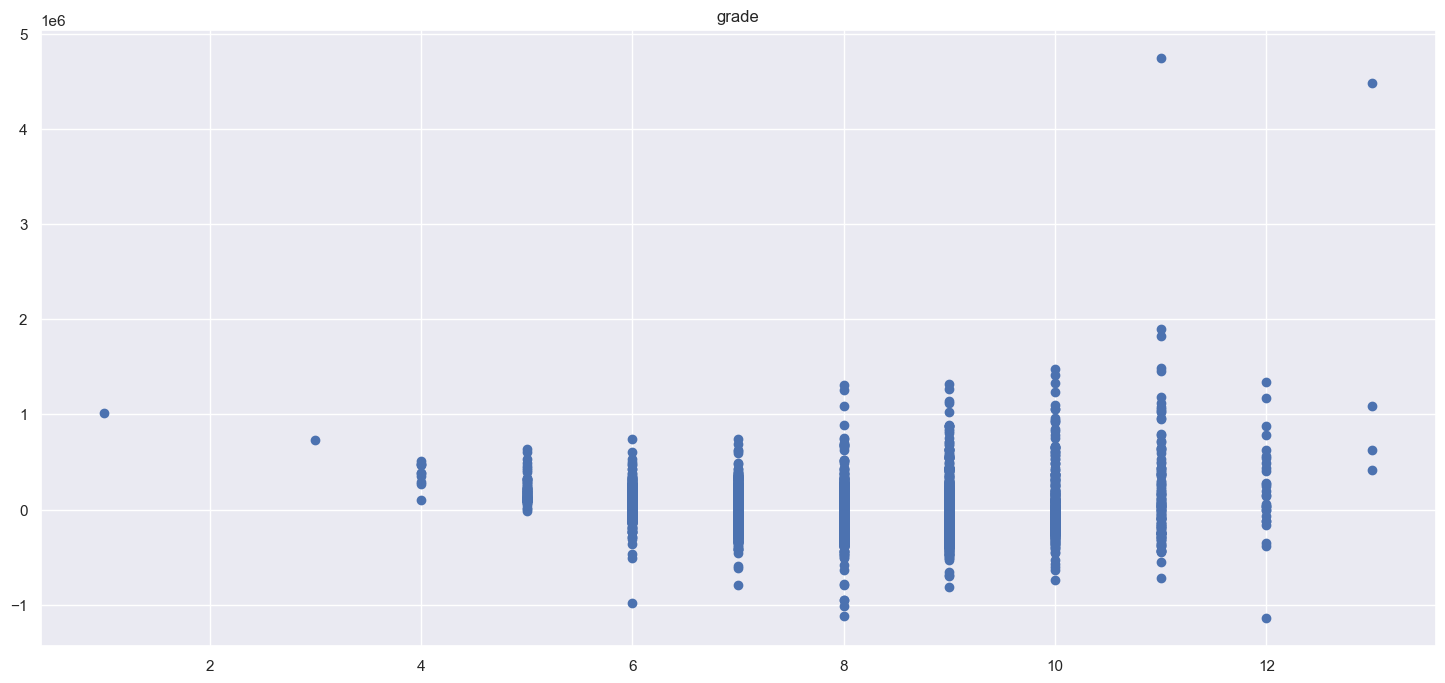

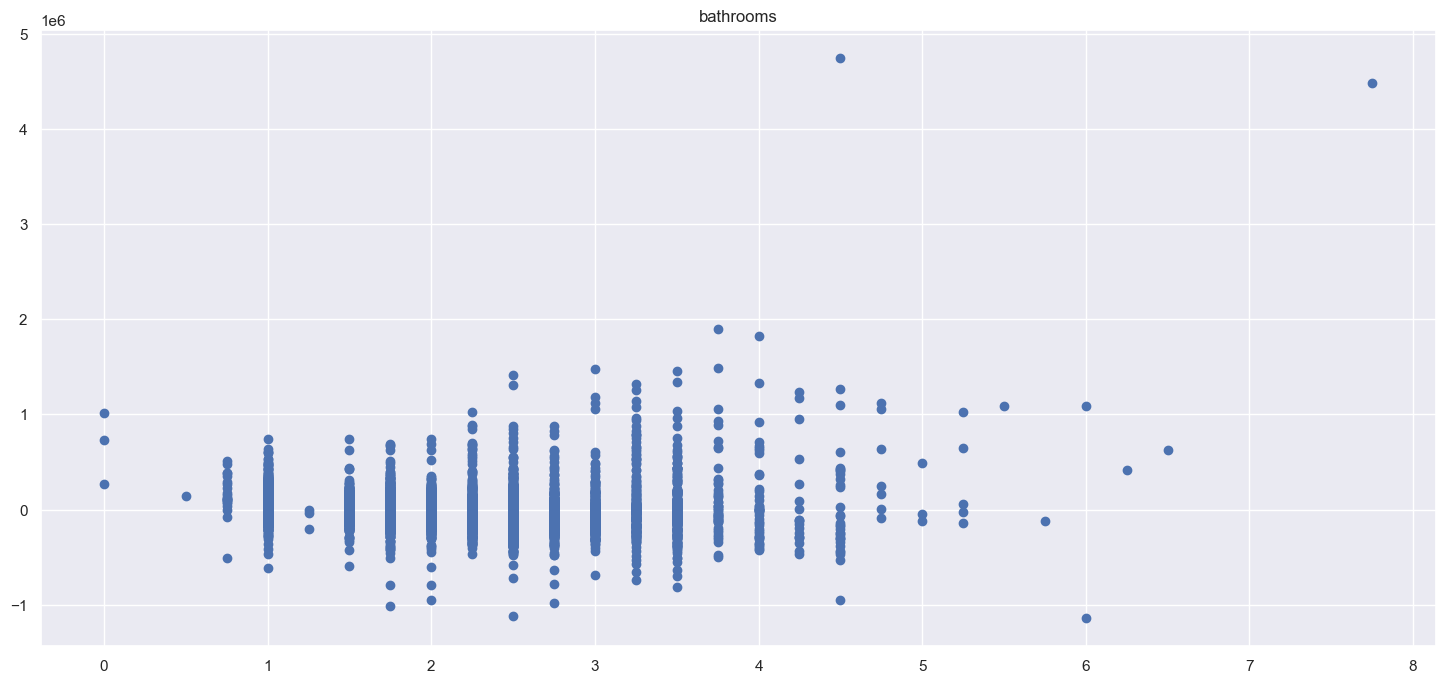

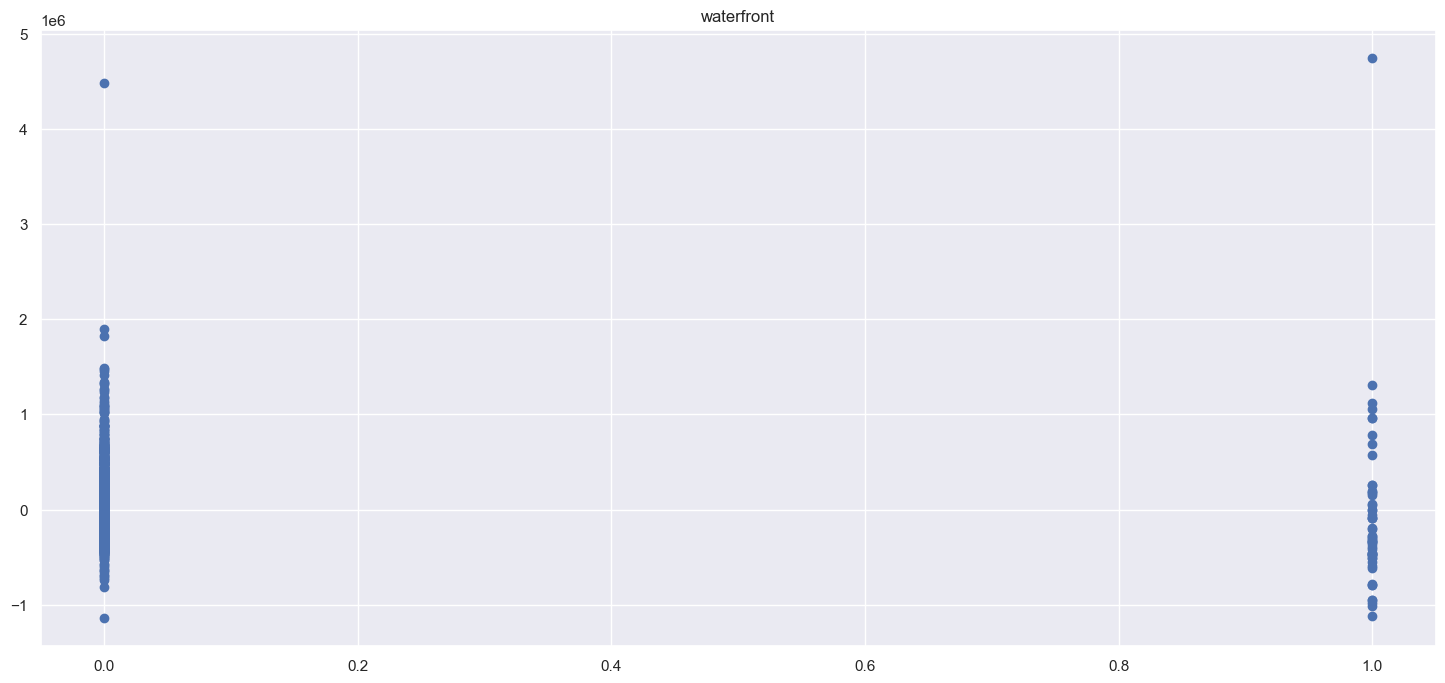

In [514]:
pred = ridge_reg.predict(X_test)
for i in ['grade', 'bathrooms','waterfront']: 
    plt.title(i)
    plt.scatter(X_test[i],y_test - pred)
    plt.show()
    

AS shown above, the spreads of the residual errors with respect to the 3 features are moderately consistent throughout the variable scales (with only a few exceptions / outliers), indicating a robust performance of Ridge linear model as it does not biased towards certain range of input feature values and should yield equally accurate results throughout the scales of the input variables

 ## Reports the results to a business executive:
 According to the result yielded by the optimal linear model, Ridge, the top 3 main drivers of house prices in King City are 'grade', 'bathrooms', and 'waterfront', with positive impact on the house price 1683421, 820157, 519844 respectively. It means that if 'grade', 'bathrooms', or 'waterfront' increase by 1 unit, the average increase in the house price is expected to be 1683421, 820157, or 519844 respectively. 

 It is noteworthy that the feature importances of the 5 dummy variables of 'view', such as 'premium' with positive coefficeint (237022) and 'worst' with negative coefficient (-153871), imply that 'view' is also a informative training feature (though may not be in the top 3 most prominent predictors of the house prices), as the houses with 'premium' = 1 will have increases in prices while the houses with 'worst' = 1 will have decreases in prices, supporting our previous analysis of 'view' being a good differentiator of house prices. 
 